# COMPETITION 1 - Advanced Preparation of Financial Data
___

<div>
<img src=https://www.investopedia.com/thmb/b8fVd80lRJAKE9slQuqBfToYoTs=/2121x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-1045262938-d6e77886128f4b05b3b4b4e3daef781a.jpg width=40%>
</div>    
<br>
<b> Research Question: </b> <em> What are the determinants of IPO underpricing phenomena?</em>
 
> <b> Model: </b> Logistic regression 
<br> <b>Accuracy metric: </b> F1 score for Y1 and Y2 (see: [F1 Scores Explained](https://en.wikipedia.org/wiki/Precision_and_recall))
<br> <b>Training set: </b> 80% random sample of dataset
<br> <b> Test set: </b> 20% random sample of dataset
<br> <b> Dependent Variables: </b>
* <b> Y1 </b> :  <em> Pre-IPO Price Revision </em>  (<b> IF </b> Offer Price IPO < (Average Price of P_High & P_Low <b> THEN </b> Y1 = 1 <b> ELSE </b> Y1 = 0)
* <b> Y2 </b> :  <em> Post-IPO Initial Return </em> (<b> IF </b> Offer Price IPO < Price 1st Trading Day Stock Market <b> THEN </b> Y2 = 1 <b> ELSE </b> Y2 = 0) 
>
> <b> Independent Variables: </b>
* See below in Chapter 1: Descriptive statistics

<b> Data preparation includes: </b>
> Descriptive statistics
<br> Imputation 
<br> Normalization
<br> Correlation analysis
<br> Standardization
<br> Recoding

<b> Conclusion: </b>
> The accuracy of our most optimal tested model is: 67.60% based on 100 trials
* using the following independent variables for Y1: 'S2’_yeojohnson', 'C4_yeojohnson', 'T1_boxcox', 'T3’_yeojohnson', 'T5’_yeojohnson', 'T4’_yeojohnson', 'C5’_boxcox', 'S2_boxcox', 'S3_boxcox', 'C1_more_than_40_days_binary', 'Y1', 'Y2'
* using the following independent variables for Y2: 'S2_boxcox', 'C4_yeojohnson', 'T3’_yeojohnson' , 'C3_yeojohnson', 'C5’_boxcox', 'I2_inc', 'C6’_yeo-johnson','SIC_Mining', 'S3_boxcox','C1_more_than_40_days_binary',  'Y1', 'Y2'

<b> General Information </b>
> <b> Authors: </b> Monika Sivilli, Brian Doyle and Anthonie Hollaar 
<br> <b> Institution: </b> Fairfield University, CT
<br> <b> Supervisor: </b> Dr. Jie Tao 
<br> <b> Course: </b> BA545: Machine Learning for Predictive Analytics
<br> <b> Date: </b> 03-03-2020

# Note - Pipeline 1:
___

> <b> Required Order: </b> 
    * Descriptive
    * Imputation
    * Calculation
<b> Optional Order: </b>
    * Outlier IQR
    * Normalization
    * Standardization - Z-score
<b> Required Order: </b>
    * Correlation
    * Binning
    * Feature Selection
    
# Note - Pipeline 2:
> <b> Required Order: </b> 
    * Descriptive
    * Imputation
    * Calculation
<b> Optional Order: </b>
    * Standardization - Min-Max
    * Normalization
    * Outlier stdev
<b> Required Order: </b>
    * Correlation
    * Binning
    * Feature Selection
    
# Note - Pipeline 3:
> <b> Required Order: </b> 
    * Descriptive
    * Imputation
    * Calculation
<b> Optional Order: </b>
    * Normalization
    * Outlier stdev
    * Standardization - Z-score
<b> Required Order: </b>
    * Correlation
    * Binning
    * Feature Selection

# __Step 0: Import Modules__ #

In [1]:
# pandas for dataframes
import pandas as pd

# numpy for calculations and arrays
import numpy as np

# Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# Recursive Feature Elimination modules
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Import the necessary libraries for Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize

# z-score
from scipy.stats import zscore
#min-max scaler
from sklearn import preprocessing

# Interquartile range (Q3-Q1) - for outliers
from scipy.stats import iqr

# Normalization (used in histogram)
from scipy import stats
from scipy.stats import norm
## metric for calculation of kurtosis and skewness
from scipy.stats import kurtosis, skew
## Box-Cox or Yeo-johnson transformation
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from scipy.stats import boxcox

# __Step 1: Descriptive statistics__
* describing the data using minimum, maximum, 1st & 3rd quartile, mean, median, standard deviation, number of records, number of missing records, ...

## Show dataset existing & added (calculated) features and definitions with respective datatypes ##

In [2]:
# Make a dictionary for descriptions of our existing features and target variables
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html
dict_data = {"I1": ["Ticker", "Ticker of the IPO", "Text", "No"], 
             "I2": ["Company Name", "Name of the company offering the IPO", "Text", "No"] , 
             "I3": ["Standard Industry Classifier", "Standardized Industrial Classifier of the offering company", "Text", "No"], 
             "P(IPO)": ["Offer Price", "This is IPO finaloffering price (in dollars) stated in the 424B4 filings", "Continuous/Float", "No"], 
             "P(H)": ["Price Range Higher Bound", "This is the higher bound(in dollars) of the filing price range stated in the S-1 filings", "Continuous/Float", "No"],
             "P(L)": ["Price Range Lower Bound", "This is the lowerbound (in dollars) of the filing price  range stated in the S-1 filings", "Continuous/Float", "No"], 
             "P(1Day)": ["First Day Trading Price", "This is the first day trading (closing) price of the stock (in dollars)", "Continuous/Float", "No"], 
             "P(mid)": ["Avg of P(H) and P(L)", "Average of Filing Price Range Higher Bound & Filing Price Range Lower Bound", "Continuous/Float", "Yes"],
             "C1": ["Days", "Calendar days between the initial S-1 filing and the filingof Form 424B4 from EDGAR", "Continuous/Float", "No"], 
             "C2": ["Top-tier Dummy", "Dummy variable, set to 1 if leading underwriter of IPO has a rating of 8 or higher, otherwise 0", "Binary/Boolean", "No"], 
             "C3": ["Earnings Per Share", "Trailing Earnings Per Share (EPS) at the time of the IPO(in dollars)", "Continuous/Float", "No"], 
             "C4": ["Prior Nasdaq 15-day Returns", "The buy-and-hold returns of the CRSP Nasdaq value-weighted index on the 15-trading days prior to the IPO day (t), ending on day t-1", "Continuous/Float", "No"], 
             "C5": ["Outstanding Shares", "Defined as the numberof outstanding common stock shares in the IPO", "Continuous/Float", "No"], 
             "C6": ["Offering Shares", "Defined as the number of offering common stock shares in the IPO", "Continuous/Float", "No"], 
             "C7": ["Sales", "Trailing annual firm sales (in millions of dollars) at the time of the IPO", "Continuous/Float", "No"], 
             "T1": ["Number of Sentences", "Number of sentences in the MD&A Sections", "Continuous/Float", "No"], 
             "T2": ["Number of Words", "Number of words in the MD&A Sections", "Continuous/Float", "No"], 
             "T3": ["Number of Real Words", "Number of textual words in the MD&A Sections", "Continuous/Float", "No"], 
             "T4": ["Number of Long Sentences", "Number of sentences with more than 20 words in the MD&A Sections", "Continuous/Float", "No"], 
             "T5": ["Number of Long Words", "Number of words with more than 10 letters in the MD&A Sections", "Continuous/Float", "No"], 
             "S1": ["Number of Positive Words", "Number of positive wordsin the MD&A Sections, according to the L&M dictionary", "Continuous/Float", "No"], 
             "S2": ["Number of Negative Words", "Number of negative words in the MD&A Sections, according to the L&M dictionary", "Continuous/Float", "No"], 
             "S3": ["Number of Uncertain Words", "Number of uncertain words in the MD&A Sections, according to the L&M dictionary", "Continuous/Float", "No"],
             "Y1": ["Pre-IPO Price Revision", "Set to 1 if P(IPO) < P(mid), where P(mid) = (P(H)+P(L))/2, otherwise 0", "Binary/Boolean", "Yes"],
             "Y2": ["Post-IPO Initial Return", "Set to 1 if P(IPO) < P(1Day), otherwise 0", "Binary/Boolean", "Yes"],
             "C3’": ["Positive EPS Dummy", "Dummy variable set to 1 if C3is positive at the time of the IPO, otherwise 0", "Binary/Boolean", "Yes"],
             "C5’": ["Share Overhang", "C5’= C5/C6", "Continuous/Float", "Yes"],
             "C6’": ["Up Revision", "Set to (P(IPO) –P(mid))/P(mid) x 100%, if P(IPO) > P(mid), otherwise 0", "Continuous/Float", "Yes"],
             #"T1’": ["Ratio: T1’= T4/T1", "Number of Long Sentences / Number of Sentences", "Continuous/Float", "Yes"],
             "T2’": ["Ratio: T2’ = T2/T1", "Number of Words/Number of Sentences", "Continuous/Float", "Yes"],
             "T3’": ["Ratio: T3’ = T3/T2", "Number of Real Words/Number of Words", "Continuous/Float", "Yes"],
             "T4’": ["Ratio: T4’ = T4/T1", "Number of Long Sentences / Number of Sentences", "Continuous/Float", "Yes"],
             "T5’": ["Ratio: T5’ = T5/T2", "Number of Long Words/Number of Words", "Continuous/Float", "Yes"],
             "S1’": ["Ratio: S1’= S1/T2", "Number of Positive Words/Number of Words", "Continuous/Float", "Yes"],
             "S2’": ["Ratio: S2’ = S2/T2", "Number of Negative Words/Number of Words", "Continuous/Float", "Yes"],
             "S3’": ["Ratio: S3’ = S3/T2", "Number of Uncertain Words/Number of Words", "Continuous/Float", "Yes"],
             "SIC_Manufacturing": ["SIC Category = Manufacturing", "IF the company's SIC Code falls into division of Manufacturing, set to 1, else to 0", "Binary/Boolean", "Yes"],
             "SIC_Services": ["SIC Category = Services", "IF the company's SIC Code falls into division of Services, set to 1, else to 0", "Binary/Boolean", "Yes"],
             "I2_inc": ["Legal Entity of the company is: Incorporated", "IF the company legal entity is Incorporated, set to 1, else to 0", "Binary/Boolean", "Yes"],
             "I2_co": ["Legal Entity of the company is: Corporation", "IF the company legal entity is Corporation, set to 1, else to 0", "Binary/Boolean", "Yes"],
             "I2_ltd": ["Legal Entity of the company is: Limited Company", "IF the company legal entity is Limited Company, set to 1, else to 0", "Binary/Boolean", "Yes"],
          }

# Make a dataframe from the dictionary with the column name description for our 2nd column
df_dict = pd.DataFrame.from_dict(dict_data, orient='index', columns=['Short Description', "Long Description", "Data Type", "Calculated Feature"])

# Display full column length of each column (for example: 'Long Description' without truncating')
pd.set_option('display.max_colwidth', -1)

# add the index name for 1st column in pandas dataframe
df_dict = df_dict.rename_axis("Feature", axis="columns")

# show dataframe (left alligned for columns specified in subset)
df_dict.style.set_properties(**{'text-align': 'left'}, subset=['Short Description', 'Long Description', 'Data Type'])

# If you want you can sort the features and target variables by calculated feature being 'No' and 'Yes'
# df_dict.sort_values(by=['Calculated Feature'], ascending=True)

Feature,Short Description,Long Description,Data Type,Calculated Feature
I1,Ticker,Ticker of the IPO,Text,No
I2,Company Name,Name of the company offering the IPO,Text,No
I3,Standard Industry Classifier,Standardized Industrial Classifier of the offering company,Text,No
P(IPO),Offer Price,This is IPO finaloffering price (in dollars) stated in the 424B4 filings,Continuous/Float,No
P(H),Price Range Higher Bound,This is the higher bound(in dollars) of the filing price range stated in the S-1 filings,Continuous/Float,No
P(L),Price Range Lower Bound,This is the lowerbound (in dollars) of the filing price range stated in the S-1 filings,Continuous/Float,No
P(1Day),First Day Trading Price,This is the first day trading (closing) price of the stock (in dollars),Continuous/Float,No
P(mid),Avg of P(H) and P(L),Average of Filing Price Range Higher Bound & Filing Price Range Lower Bound,Continuous/Float,Yes
C1,Days,Calendar days between the initial S-1 filing and the filingof Form 424B4 from EDGAR,Continuous/Float,No
C2,Top-tier Dummy,"Dummy variable, set to 1 if leading underwriter of IPO has a rating of 8 or higher, otherwise 0",Binary/Boolean,No


In [3]:
# load Dataset
# source: https://pythonspot.com/read-excel-with-pandas/
data = pd.read_excel('Competition1_raw_data.xlsx', sheet_name=0)

In [4]:
# Return the first n rows (n=15)
data.head(5)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,...,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,...,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,...,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.6,80,1,0.07,...,8250000,632.298,572,14830,13176,336,720,67,149,167


In [5]:
# Show number of rows and number of columns of dataframe
data.shape
print('There are:', data.shape[0], 'rows in the dataset')
print('There are:', data.shape[1], 'columns in the dataset')

There are: 682 rows in the dataset
There are: 22 columns in the dataset


In [6]:
# Show descriptives
data.describe().round(2)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682,682,682,682,682,682,682,682,682,682,...,682,682,682,682,682,682,682,682,682,682
unique,682,682,202,62,52,48,531,245,3,373,...,336,611,408,672,657,332,466,146,222,214
top,RVBD,"FIRST SOLAR, INC.",2834,15,16,14,-,-,1,-,...,5000000,-,411,0,0,256,458,46,77,110
freq,1,1,76,54,109,105,22,22,567,36,...,48,72,7,2,3,6,5,15,11,12


# 1.1 Check For Missing Values

In [7]:
# Check for missing values in the form of NaN's (already know that missing values are represented by dashes, but defensive coding)
#data.isna().any()

# Show missing values (dashes '-') for each column
list_dashes = data.isin(['-']).sum(axis=0)
list_dashes
print(list_dashes)

I1         0 
I2         0 
I3         8 
P(IPO)     5 
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5         6 
C6         6 
C7         72
T1         1 
T2         1 
T3         1 
T4         1 
T5         1 
S1         1 
S2         1 
S3         1 
dtype: int64


# 1.2 Replace Missing Values -> Dashes by NaN's

In [8]:
# Replace missing values with NaN's
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna
data.replace(to_replace='-', value=np.nan, inplace=True)

# Count NaN's
list_nan = data.isna().sum()
#print(list_nan)

# Double-check if the list of # dashes equals the list of # NaN's (Defensive Coding, not only visual inspection but also calculate)
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.equals.html
list_dashes.equals(list_nan)

True

# 1.3 Show NaNs and Zeros#

In [9]:
def nans_missing(df):
    # Count NaN's
    list_nan = df.isna().sum()

    # Percentage of missing values for each column (To see the amount of usable data for each column and infer the effect replacing NaN's will have by some metric in part 2)
    list_nan_pct = df.isna().mean().round(4) * 100

    # Calculate the sum of the number of times a zero appears in a feature 
    list_zeros = df.isin([0]).sum()

    # Calculate a % of the number of times a zero appears in a feature
    list_zeros_pct = df.isin([0]).mean().round(4) * 100

    # create a dataframe showing the missing and percentage that is missing
    df_combined = pd.concat([list_nan.rename('# NaNs'), list_zeros.rename('# Zeros'), list_nan_pct.rename('% NaNs'), list_zeros_pct.rename('% Zeros')], axis=1)
    
    return(df_combined)

nans_missing(df=data)

,# NaNs,# Zeros,% NaNs,% Zeros
I1,0,0,0.00,0.00
I2,0,0,0.00,0.00
I3,8,0,1.17,0.00
P(IPO),5,0,0.73,0.00
P(H),10,1,1.47,0.15
P(L),10,0,1.47,0.00
P(1Day),22,4,3.23,0.59
C1,22,0,3.23,0.00
C2,22,93,3.23,13.64
C3,36,5,5.28,0.73


# __2. Imputation__
dealing with missing data, you can choose from the following strategies: 
* i) drop the record with missing (highly discouraged); 
* ii) replace the missing with mean/median/mode, determined on the data type; 
* iii) replacing missing values in continuous field with linear regression predictions;

### Additional Note - test if every feature (column) upholds the expected requirements - No 'Missing' ###
- expected value to be positive
- expected value to be negative
- expected value to be zero
- expected value to be unequal to zero
- expected value to be between a certain range (i.e. 0 and 1)
- expected minimum number of characters
- expected maximum number of characters
- expected data type

## __2.1: Change Data Types__ (Existing Features/columns) ##

In [10]:
# Change data types according to the file: DataDictionary20190115.pdf
# Source: https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/

# Show data types of raw dataset
#data.dtypes

# make a dictionary for the data types per column name
convert_dict = {'I1': str, 
                'I2': str,
                'I3': str,
                'P(IPO)': float,
                'P(H)': float,
                'P(L)': float, 
                'P(1Day)': float,
                'C1': float,
                'C2': bool,
                'C3': float,
                'C4': float,
                'C5': float,
                'C6': float,
                'C7': float,
                'T1': float,
                'T2': float,
                'T3': float,
                'T4': float,
                'T5': float,
                'S1': float,
                'S2': float,
                'S3': float
               } 

# convert the features' datatype according to the dictionary
data = data.astype(convert_dict) 

# show the datatypes of the existing features
#data.dtypes

## <b> 2.2 Imputation </b> - Continuous Features ##

> <b> Impute P features </b>
* Drop rows if <b> Y1 </b> or <b> Y2 </b>  cannot be calculated -> missing in either 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)'
    * Permission granted by Professor Tao to drop those 22 rows

In [11]:
# show number of missing for features that are needed for Y1 & Y2
print(data[['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)']].isna().sum())

# show rows which have missing for P(IPO), P(H), P(L), P(1Day)
data[data['P(IPO)'].isnull() | data['P(H)'].isnull() | data['P(L)'].isnull() | data['P(1Day)'].isnull()][['I2', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)']]

P(IPO)     5 
P(H)       10
P(L)       10
P(1Day)    22
dtype: int64


,I2,P(IPO),P(H),P(L),P(1Day)
10,"ADCARE HEALTH SYSTEMS, INC",NaN,NaN,NaN,NaN
86,BLOUNT INTERNATIONAL INC,NaN,NaN,NaN,NaN
115,"CHINA ELECTRIC MOTOR, INC.",4.50,6.5,5.50,NaN
123,"China Intelligent Lighting & Electronics, Inc.",3.00,5.0,4.00,NaN
203,"Electromed, Inc.",4.00,6.0,4.00,NaN
215,EUROSEAS LTD.,7.00,NaN,NaN,NaN
217,EURAND N.V.,16.00,19.0,17.00,NaN
268,GLOBAL SIGNAL INC,18.00,NaN,NaN,NaN
286,"Highpower International, Inc.",3.25,4.0,3.00,NaN
330,KKR Financial Holdings LLC,NaN,NaN,NaN,NaN


In [12]:
# Drop rows for which both Y1 and Y2 cannot be calculated: 
# Y1 dependent vars: P(IPO), P(H), P(L)
# Y2 dependent vars: P(IPO), P(1Day)

# create a backup of the old dataframe and call it 'data_old'
data_old = data

# drop NaN's for features: P(IPO)', 'P(H)', 'P(L)', 'P(1Day)
data = data.dropna(subset=['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)'])

# test how many rows are left from original dataframe (682 rows in originial)
#data.shape

In [13]:
# test if dropping Nan's was succesfull for P(IPO), P(H), P(L), P(1Day), by showing # Nan's in each column

# create a new df for missing in original df
df_missing_old = data_old.isna().sum()

# create a new df for missing in new df (new because nan's are replaced for Y1 and Y2 dependent variables: P(IPO), P(H), P(L), P(1Day))
df_missing_new = data.isna().sum()

# combine two dataframes to compare new vs old
df_missing_new_vs_old = pd.concat([df_missing_new, df_missing_old], axis=1)

# Rename column headers
df_missing_new_vs_old.columns = ['# Missing New', '# Missing Old']

# show combined df with missing new df vs old df
print('22 rows deleted in total where Y1&Y2 could not be calculated:')
df_missing_new_vs_old

22 rows deleted in total where Y1&Y2 could not be calculated:


,# Missing New,# Missing Old
I1,0,0
I2,0,0
I3,0,0
P(IPO),0,5
P(H),0,10
P(L),0,10
P(1Day),0,22
C1,0,22
C2,0,0
C3,24,36


In [14]:
# P(H) & P(L) #
# Requirement: Price Range Higher Bound should always be larger or equal to Price Range Lower Bound
# Definition P(H): Price Range Higher Bound - This is the higher bound (in dollars) of the filing price range stated in the S-1 filings
# Definition P(L): Price Range Lower Bound - This is the lower bound (in dollars) of the filing price range stated in the S-1 filings

# test if P(H) is smaller than P(L) for rows in our dataset
print(data[data['P(H)'] < data['P(L)']][['I1', 'I2', 'P(H)', 'P(L)']])

# -------------------------------------------------------------------------------------------------
# Strategy 1: IF P(H) < P(L) => Replace the Price Range Higher Bound by the Price Range Lower Bound
# -------------------------------------------------------------------------------------------------
# replace the P(H) by the P(L)
data['P(H)'] = np.where((data['P(H)'] < data['P(L)']), data['P(L)'], data['P(H)'])

# print conclusion
print('Succesfully replaced 2 rows, whereby the Price Higher Bound is smaller then the Price Lower Bound')

# test if P(H) was correctly replaced for 2 rows by the P(L)
data.loc[[332, 416], ['I1', 'I2', 'P(H)', 'P(L)']]

# -------------------------------------------------------------------------------------------------
# Strategy 2: IF P(H) < P(L) => Replace the Price Range Higher Bound by the Price Range Lower Bound multiplied by a % of which this is on average higher in our dataset relative to the lower bound
# -------------------------------------------------------------------------------------------------
# OPTIONAL STRATEGY...

       I1                      I2  P(H)  P(L)
332  KIPS  Kips Bay Medical, Inc.  0.0   8.0 
416  NPTT  NPTEST HOLDING CORP     3.0   11.0
Succesfully replaced 2 rows, whereby the Price Higher Bound is smaller then the Price Lower Bound


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,I1,I2,P(H),P(L)
332,KIPS,"Kips Bay Medical, Inc.",8.0,8.0
416,NPTT,NPTEST HOLDING CORP,11.0,11.0


In [15]:
# P(1Day) #
# Check if there are any zero's in P(1Day)

# calculate % that is zero for P(1Day)
print(str(data[data['P(1Day)'] == 0].shape[0]/data['P(1Day)'].shape[0]*100)+str('%'))
#(4/660)*100

# show the rows which have zero for the feature P(1Day)
data[data['P(1Day)'] == 0]

# comment: unless we could find the actual closing price for each stock in the IPO we cannot impute
# tried finding ticker: 'ACW' on Yahoo Finance without results
# since it only affects 0.61% of our dataset it will not affect our final results by much

0.6060606060606061%


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.0,106.0,True,1.49,...,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0
266,GSAT,"Globalstar, Inc.",4899,17.0,18.0,16.0,0.0,108.0,True,0.23,...,7500000.0,127.147,759.0,18196.0,16262.0,397.0,959.0,85.0,228.0,173.0
279,HERO,"HERCULES OFFSHORE, INC.",1381,20.0,20.0,18.0,0.0,111.0,True,NaN,...,9200000.0,NaN,494.0,12518.0,11207.0,297.0,603.0,49.0,103.0,135.0
364,MATH,SAJAN INC,3674,6.0,8.0,6.0,0.0,85.0,False,-0.95,...,4000000.0,130.000,235.0,5674.0,5085.0,132.0,284.0,27.0,66.0,63.0


> <b>  Impute C features </b>
<br> Conditions:
    * C1 can only be equal to zero or greater than zero (not negative!)
    * C2 can only be 1 or 0 (binary) - True/False
    * C3, C4 can be both negative, zero or larger than zero
    * C5, C6 can only be greater than zero & (offering shares <= outstanding shares)
    * C7 can only be greater than zero or zero (if the firm did not have a year of trailing annual sales) - 
      ASSUMPTION is up for discussion

In [16]:
# C1 #
# Definition C1: Days - Calendar days between the initial S-1 filing and the filing of Form 424B4 from EDGAR #
# check if C1 has no negative values
data['C1'].describe().round(2)

# test if there are no rows with negative values, if no negative values then statement = True
print('There are no negative values for C1, this statement is:', data[data['C1'] < 0]['C1'].count() == 0)
# print our conclusion after testing
print('No imputation needed')

# Note: discussed with Prof. Tao about the small amount of calendar days between initial S-1 filing and filing of Form 424B4 
# which seems extremely low for some companies <15 days, because the average processing time by the government is usually longer, 
# for now we assume that is possible!
# Optional step: impute all values lower than 15 days to 15 days to see if model improves => however not many in dataset (7 values)

There are no negative values for C1, this statement is: True
No imputation needed


In [17]:
# C2 #
# Definition C2: Top-tier Dummy - Dummy variable, set to 1 if leading underwriter of IPO has a rating of 8 or higher, otherwise 0
data['C2'].describe()

# test if there are only True/False statements in C2
print('The only values in C2 are:\n', data['C2'].value_counts())
# print our conclusion after testing
print('No imputation needed')

The only values in C2 are:
 True     567
False    93 
Name: C2, dtype: int64
No imputation needed


In [18]:
# C3 #
# Definition: Earnings Per Share - Trailing Earnings Per Share (EPS) at the time of the IPO (in dollars)
# Earnings per share (EPS) is calculated as a company's profit divided by the outstanding shares of its common stock.
# Source: https://www.investopedia.com/terms/e/eps.asp
data['C3'].describe()

# We already saw that there 24 missing values!
print('C3 values which are NaN:', data['C3'].isna().sum())
# print the calculated % missing of C3
print('C3 % which are NaN', data['C3'].isna().mean().round(4)*100, '%')
# print our conclusion after testing
print('C3 NaNs can be replaced by the function in this chapter by the mean/median/zero of the EPS, imputation needed!!!')

# Check companies which have a EPS of zero
data[data['C3'] == 0]

# just like the NaN's the zero's can be replaced by the mean/median or kept zero
print(data[data['C3'] == 0]['C3'].count(), 'companies have an EPS of zero, these can be replaced by the function in this chapter by the mean/median/zero of the EPS, imputation possible but not needed...')

C3 values which are NaN: 24
C3 % which are NaN 3.64 %
C3 NaNs can be replaced by the function in this chapter by the mean/median/zero of the EPS, imputation needed!!!
5 companies have an EPS of zero, these can be replaced by the function in this chapter by the mean/median/zero of the EPS, imputation possible but not needed...


In [19]:
# C4 #
# Definition: Prior Nasdaq 15-day Returns
# The buy-and-hold returns of the CRSP Nasdaq value-weighted index on the 15-trading days prior to the IPO day (t), ending on day t-1
data['C4'].describe()

print('C4 seems to uphold conditions: negative|positive|zero, no imputation needed')

C4 seems to uphold conditions: negative|positive|zero, no imputation needed


In [20]:
# C5 #
# Definition: Outstanding Shares - Defined as the number of outstanding common stock shares in the IPO
data['C5'].describe()

print('C5 only has positive values, because statement minimum C5 > than 0, is:', data['C5'].min() > 0, ', no imputation needed')

C5 only has positive values, because statement minimum C5 > than 0, is: True , no imputation needed


In [21]:
# C6 #
# Definition: Offering Shares - Defined as the number of offering common stock shares in the IPO
data['C6'].describe()

# Cross-column validation -> offering shares more than outstanding shares
# Source: https://www.wallstreetmojo.com/issued-vs-outstanding-shares/ "Outstanding shares are less than or equal to Issued shares"
more_offering_than_outstanding_shares = data[data['C6'] > data['C5']][['I2', 'C5', 'C6']]

print('Before imputation, there are:', data[data['C6'] > data['C5']].shape[0], 'companies with more offering shares than outstanding shares, see dataframe below:')

more_offering_than_outstanding_shares['C6_minus_C5'] =  more_offering_than_outstanding_shares['C6']-more_offering_than_outstanding_shares['C5']
print(more_offering_than_outstanding_shares)

# STRATEGY 1:
# ASSUME THERE CANNOT BE MORE OFFERING SHARES THAN OUTSTANDING (the division of C5/C6)
# IF more offering shares THAN outstanding shares, set offering shares equal to outstanding shares
data['C6'] = np.where((data['C6'] > data['C5']), data['C5'], data['C6'])

print('After imputation (setting max offering shares = outstanding shares), there are:', data[data['C6'] > data['C5']].shape[0], 'companies with more offering shares than outstanding shares')

Before imputation, there are: 5 companies with more offering shares than outstanding shares, see dataframe below:
                                  I2          C5          C6  C6_minus_C5
169  DEX MEDIA INC                    15028162.0  53061224.0  38033062.0 
302  INTERMOLECULAR INC               42133168.0  96500000.0  54366832.0 
532  Sunstone Hotel Investors, Inc.   19112556.0  21294737.0  2182181.0  
536  U.S. SILICA HOLDINGS, INC.       8823529.0   11764705.0  2941176.0  
558  Scorpio Tankers Inc.             5589147.0   12500000.0  6910853.0  
After imputation (setting max offering shares = outstanding shares), there are: 0 companies with more offering shares than outstanding shares


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
# C7 #
# Definition: Sales - Trailing annual firm sales (in millions of dollars) at the time of the IPO

# inspect metrics of C7
data['C7'].describe()

# we already saw there were 60 missing
print('column C7 has:', data['C7'].isna().sum(), 'missing/NaNs')

#show rows for C7 that have NaN's
#data[data['C7'].isna()]

# ----------------------------------------------------------------------------------------------
# Strategy 1: replace C7 with zero, assumption: because no prior yearly sales have been made yet
# ----------------------------------------------------------------------------------------------
# see below functions for imputing:
# - 1. Replace Nan's Continuous/Float Fields by zero

# ----------------------------------------------------------------------------------------------
# Strategy 2: replace C7 with average/median
# ----------------------------------------------------------------------------------------------
# see below functions for imputing: 
# - 2. Replace NaN's Continuous/Float Fields by their MEAN
# - 3. Replace NaN's Continuous/Float Fields by their MEDIAN

# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Strategy 3: replace C7 values that are missing, based on other columns -> percentage of (offer price*outstanding shares)*5% (assuming 5% is the profit of the sales)
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

column C7 has: 60 missing/NaNs


> <b>  Impute T features </b>
<br> Conditions:
    * T1 needs to be positive (cannot be zero or negative)
    * T2 needs to be positive (cannot be zero or negative)
    * T3 is most likely positive (cannot be negative)
    * T4 is most likely positive (cannot be negative)
    * T5 is most likely positive or can be zero (cannot be negative)
    * If there are sentences (T1 > 0) than there need to be words (T2 > 0)
    * If there are words (T2 > 0) than there need to be sentences (T1 > 0)

In [23]:
# T1 #
# Definition: Number of Sentences - Number of Sentences in the MD&A Sections

# inspect metrics of T1
data['T1'].describe()

# show the dataframe for values smaller than zero
#data[data['T1'] < 0]['T1']

# count the values smaller than zero
data[data['T1'] < 0]['T1'].count()

# print our conclusion after testing
print('T1 only has positive values, because statement minimum T1 > than 0, is:', data['T1'].min() > 0, ', no imputation needed')

T1 only has positive values, because statement minimum T1 > than 0, is: True , no imputation needed


In [24]:
# T2 #
# Definition: Number of Words - Number of words in the MD&A Sections

# inspect metrics of T2
print(data['T2'].describe())
print("\n") # print new line

# show the dataframe for values smaller than zero
#data[data['T2'] < 0]['T2']
# count the values smaller than zero
data[data['T2'] < 0]['T2'].count()

# show rows which have zero number of words
print(data[data['T2'] == 0][['I2', 'T1', 'T2']])
print("\n") # print new line

# show # rows for T2 in old dataframe
print('old dataframe # of rows:', data['T2'].shape[0])

# show shape of only rows in new dataframe which have only an amount of words bigger than zero
print('new dataframe # of rows:', data[data['T2'] > 0].shape[0])

# print our first conclusion after testing
print('T2 only has positive values or equal to zero, because statement minimum T1 >= than 0, is:', data['T2'].min() >= 0)
print("\n") # print new line

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# STRATEGY 1: IF T2 equals zero, THEN impute T2 (# words) based on T1 (# sentences) => get the average amount of words per sentence in dataset and multiply by amount of sentences 
# - Note: excluding the 2 rows where T2 equals zero, for calculating the mean which will impact the mean # of words
# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# calculate the average number of words per sentence in the dataset, excluding these 2 rows which have 0 words (T2=0), but (T1 > 0)
avg_words_per_sentence = (data[data['T2'] > 0]['T2']/data[data['T2'] > 0]['T1']).mean()
print('average # words per sentence:', avg_words_per_sentence)
print("\n")
# replace/impute the average number of words per sentence for 2 rows, whereby # of sentences multiplied by # average words per sentence
data['T2'] = np.where((data['T2'] == 0), data['T1']*avg_words_per_sentence, data['T2']) 
    
# test if rows where T2 equals 0 is replaced by T1 * avg_words_per_sentence
data[data['T2'] == 0]

# show specific rows
print(data.loc[[125, 199],['I2', 'T1', 'T2']])
print("\n") # print new line

# test calculation for 2 rows which had 0 words but > 0 amount of sentences, the following formula: T1 * avg_words_per_sentence
#print(656*avg_words_per_sentence)
#print(619*avg_words_per_sentence)

# inspect metrics after imputation of T2
print(data['T2'].describe())

count    660.000000  
mean     12849.703030
std      5461.888999 
min      0.000000    
25%      9213.750000 
50%      12112.500000
75%      15275.000000
max      49056.000000
Name: T2, dtype: float64


                          I2     T1   T2
125  CLOUD PEAK ENERGY INC.   656.0  0.0
199  Edgen Group Inc.         619.0  0.0


old dataframe # of rows: 660
new dataframe # of rows: 658
T2 only has positive values or equal to zero, because statement minimum T1 >= than 0, is: True


average # words per sentence: 27.295028759788664


                          I2     T1            T2
125  CLOUD PEAK ENERGY INC.   656.0  17905.538866
199  Edgen Group Inc.         619.0  16895.622802


count    660.000000  
mean     12902.432063
std      5421.435941 
min      3271.000000 
25%      9275.500000 
50%      12141.500000
75%      15299.000000
max      49056.000000
Name: T2, dtype: float64


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
# T3 #
# Definition: Number of Real Words - Number of textual words in the MD&A Sections

# show the rows which have 0 number of real Words
data[data['T3'] == 0]

# replace for those that have 0 real words by the average real words of toal words in the dataset

## show the rows which have 0 real words
print(data[data['T3'] == 0][['I2','T1', 'T2', 'T3']])

## calculate the average of real words per number of words excluding these 3 rows
avg_ratio_realwords_of_totalwords = ((data[data['T3'] != 0]['T3'])/(data[data['T3'] != 0]['T2'])).mean()

## print the average number of real words per total words (rounded by the nearest 2 decimals)
print('Average number of real words per total words:', avg_ratio_realwords_of_totalwords.round(4))

## replace the 3 rows which have 0 real words in the dataset by a formula: avg_realwords_of_totalwords x (# of words)
data['T3'] = np.where((data['T3'] == 0), avg_ratio_realwords_of_totalwords*data['T2'], data['T3'])

# test if replacement worked for those 3 particular rows
data.loc[[27, 256,484], :]

# test calculation row with index 27 (ratio of real words of total words times the number of total words)
# 15006*0.8944

                        I2     T1       T2   T3
27   AMIS HOLDINGS INC      527.0  15006.0  0.0
256  Gordmans Stores, Inc.  385.0  12828.0  0.0
484  QUINSTREET, INC        539.0  16189.0  0.0
Average number of real words per total words: 0.8944


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
27,AMIS,AMIS HOLDINGS INC,3674,20.0,20.0,18.0,20.10,40.0,True,-0.41,...,30000000.0,345.322,527.0,15006.0,13421.724374,334.0,809.0,46.0,181.0,167.0
256,GMAN,"Gordmans Stores, Inc.",5600,11.0,15.0,13.0,11.03,97.0,True,0.13,...,5357143.0,438.135,385.0,12828.0,11473.669217,286.0,591.0,79.0,89.0,181.0
484,QNST,"QUINSTREET, INC",7389,15.0,19.0,17.0,15.00,84.0,True,0.38,...,10000000.0,260.527,539.0,16189.0,14479.827795,387.0,742.0,59.0,160.0,170.0


In [26]:
# T4 #
# Definition: Number of Long Sentences - Number of sentences with more than 20 words in the MD&A section

# check for each row if there are not more 'long sentences' than there are sencentes
data[data['T4'] >= data['T1']]

# assumption that there do not need to be any long sentences in the MD&A Sections
# check rows which have zero long sentences
print(data[data['T4'] == 0][['I2','T1', 'T2', 'T3', 'T4']])

# for those rows check if the number of words divided by number of sentences stays below or equal to 20 words per sentence 
# you cannot have less or equal to 20 words per sentence on average and have 0 number of long sentences
# in that case there must be long sentences! (we assume)

# check IF (#words/#sentences) >20 AND where the number of long sentences are equal to zero
data[(data['T2']/data['T1'] > 20) & (data['T4'] == 0)]

# this means we must impute T4 for those 2 rows by for example the average number of long sentences based on the number of sentences for that row
## calculate the average ratio of:  # long sentences / # sentences excluding those rows where T4 equals zero (else the mean calculation would include those zero's wrongfully)
avg_ratio_longsentences_of_totalsentences = ((data[data['T4'] != 0]['T4'])/(data[data['T4'] != 0]['T1'])).mean()
print('Average long sentences divided by total sentences:', avg_ratio_longsentences_of_totalsentences)

## replace/impute T4 for those 2 rows which have 0 for T4 but more than 20 words on average per sentence
data['T4'] = np.where((data['T4'] == 0), avg_ratio_longsentences_of_totalsentences*data['T1'], data['T4'])

## show 2 rows which have replaced the T4 of zero by the avg ratio of long sentences mulitplied by its sentences
data.loc[[250, 478], :]

## test 1st row if replaced succesfully for T4
#473*0.6286251601786513

                                   I2     T1       T2       T3   T4
250  Global Geophysical Services Inc   473.0  12699.0  11422.0  0.0
478  PeopleSupport, Inc.               483.0  12658.0  11451.0  0.0
Average long sentences divided by total sentences: 0.6286251601786514


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
250,GGS,Global Geophysical Services Inc,1382,12.0,17.0,15.0,12.0,188.0,True,0.05,...,7500000.0,312.796,473.0,12699.0,11422.0,297.339701,693.0,84.0,112.0,123.0
478,PSPT,"PeopleSupport, Inc.",7389,7.0,12.0,10.0,6.5,144.0,False,0.67,...,6818182.0,30.013,483.0,12658.0,11451.0,303.625952,800.0,67.0,161.0,152.0


In [27]:
# T5 #
# Definition: Number of long words: number of words with more than 10 letters in the MD&A Sections

# show descriptives of feature T5 - it shows that the minimum equals -1
data['T5'].describe()

# Test - T5 cannot be smaller than zero => 1 row found which has a value of -1 for T5
print(data[data['T5'] < 0][['I2','T1', 'T2', 'T3', 'T4', 'T5']])

# Test - show the rows which have T5 equal to zero => 0 rows found
data[data['T5'] == 0]

## calculate the ratio of the average number of long words to the the number of total words (excluding 1 row with -1 for T5)
avg_ratio_longwords_of_totalwords = ((data[data['T5'] >= 0]['T5'])/(data[data['T5'] >= 0]['T2'])).mean()
print('Average long words to the total words:', avg_ratio_longwords_of_totalwords)

## replace where T5 is smaller than zero by the average ratio of long words to the total words
data['T5'] = np.where((data['T5'] < 0), avg_ratio_longwords_of_totalwords*data['T2'], data['T5'])

## show 1 row which have replaced the T5 of -1 by the avg ratio of long words mulitplied by its total words
data.loc[[7], :]

## test 1st row if replaced succesfully for T5
#11226*0.05218085951879797

                           I2     T1       T2       T3     T4   T5
7  ACELRX PHARMACEUTICALS INC  334.0  11226.0  10056.0  276.0 -1.0
Average long words to the total words: 0.052180859518797966


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.55,91.0,False,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,585.782329,55.0,120.0,122.0


> <b>  Impute S features </b>
<br> Conditions:
    * S1 most likely positive (cannot be negative)
    * S2 most likely positive (cannot be negative)
    * S3 most likely positive (cannot be negative)
    * Cannot be more negative/postive/uncertain words than total number of words (T2), so condition must hold: S1-S3 < T2

In [28]:
# S1 #
# Definition: Number of Positive Words - Number of positive words in the MD&A Sections, according to the L&M dictionary

# show descriptives of feature S1 - minimum is -1 so at least 1 row needs imputation
data['S1'].describe()

# test # rows for which S1 is negative => 1 row has -1 for S1, imputation needed
print(data[data['S1'] < 0][['I2','T1', 'T2', 'T3', 'T4', 'T5', 'S1']])

# test # rows for which S1 is zero => 0 rows found for S1
data[data['S1'] == 0]

# test # rows for which there are more postive words than total words => 0 rows found
data[data['S1'] > data['T2']]

## calculate the ratio of the average number of positive words to the the number of total words (excluding 1 row with -1 for S1)
avg_ratio_positivewords_of_totalwords = ((data[data['S1'] >= 0]['S1'])/(data[data['S1'] >= 0]['T2'])).mean()
print('Average positive words to the total words:', avg_ratio_positivewords_of_totalwords)

## replace where S1 is smaller than zero by the average ratio of long words to the total words
data['S1'] = np.where((data['S1'] < 0), avg_ratio_positivewords_of_totalwords*data['T2'], data['S1'])

## show 1 row which have replaced the S1 of -1 by the avg ratio of positive words mulitplied by its total words
data.loc[[134], :]

## test 1st row if replaced succesfully for S1
#10764*0.0053110987403162824

               I2     T1       T2      T3     T4     T5   S1
134  Cogent, inc.  419.0  10764.0  9856.0  259.0  643.0 -1.0
Average positive words to the total words: 0.0053110987403162824


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
134,COGT,"Cogent, inc.",7373,12.0,12.0,10.0,17.98,133.0,True,0.14,...,18000000.0,32.179,419.0,10764.0,9856.0,259.0,643.0,57.168667,97.0,134.0


In [29]:
# S2 #
# Definition: Number of Negative Words - Number of negative words in the MD&A Sections, according to the L&M dictionary

# show descriptives of feature S2 => no negative values found, minimum equals 20.00
data['S2'].describe().round(2)

# test that no rows have negatives => zero rows with negative values for S2
data[data['S2'] < 0]

# test that no rows have zeros => 0 rows with zero values for S2
data[data['S2'] == 0]

# test number of rows for which there are more negative words than total words => 0 rows found
data[data['S2'] > data['T2']]

# conclusion
print('No imputation needed for S1, all values are positive')

No imputation needed for S1, all values are positive


In [30]:
# S3 #
# Number of Uncertain Words - Number of uncertain words in the MD&A Sections, according to the L&M dictionary

# show descriptives of feature S3 => no negative values found, minimum equals 40.00
data['S3'].describe()

# test that no rows have negatives => zero rows with negative values for S3
data[data['S3'] < 0]

# test that no rows have zeros => 0 rows with zero values for S3
data[data['S3'] == 0]

# test number of rows for which there are more uncertain words than total words => 0 rows found
data[data['S3'] > data['T2']]

# conclusion
print('No imputation needed for S3, all values are positive')

No imputation needed for S3, all values are positive


In [31]:
# test if S1 plus S2 plus S3 equals or is smaller than T2
# because postive, negative and uncertain words cannot be larger than total number of words (assuming a positive/negative or uncertain word cannot be in multiple catogories)
data[(data['S1']+data['S2']+data['S3']) >= data['T2']]

# conclusion
print('The number of positive + negative + uncertain words is less than total number of words, condition holds, no imputation needed!')

The number of positive + negative + uncertain words is less than total number of words, condition holds, no imputation needed!


In [32]:
# as a visual reminder, show NaNs and Missing for each feature
nans_missing(df=data)

,# NaNs,# Zeros,% NaNs,% Zeros
I1,0,0,0.00,0.00
I2,0,0,0.00,0.00
I3,0,0,0.00,0.00
P(IPO),0,0,0.00,0.00
P(H),0,0,0.00,0.00
P(L),0,0,0.00,0.00
P(1Day),0,4,0.00,0.61
C1,0,0,0.00,0.00
C2,0,93,0.00,14.09
C3,24,5,3.64,0.76


## __FUNCTIONS FOR IMPUTING__ ##

In [33]:
# NOTES #
# Previous testing showed us the following features need imputation or are already imputed above:
# ----------------------------
# 1. STILL NEED IMPUTATION
# ----------------------------
    # C3 #
    # - Missing C3 can be replaced by the function in this chapter by the mean/median/zero of the EPS
    # - 24 NaNs and 5 Zero's in dataset

    # C7 #
    # - Strategy 1: replace C7 NaN's with zero, assumption: because no prior yearly sales have been made yet
    # - Strategy 2: replace C7 NaN's with average/median
    # - Strategy 3: replace C7 values that are missing, based on other columns -> percentage of (offer price*outstanding shares)*5% (assuming 5% is the profit of the sales)
# ----------------------------
# 2. ALREADY IMPUTED VARIABLES
# ----------------------------
    # P variables for which we could not calculate Y1 & Y2 
    # 22 rows removed
    
    # T2 #
    # - Strategy 1: replace Zero's with formula: (the average ratio of words per sentence in dataset multiply by amount of sentences)
    # 2 rows affected

    # T3 #
    # - Strategy 1: replace zero's with formula: (the average ratio of real words to total words * the number of words)
    
    # T4 #
    # - Strategy 1: replace zero's with formula: (the average ratio of long sentences to total sentences * the number of sentences)
    
    # T5 #
    # - Strategy 1: replace negative value with formula: (the average ratio of long words to total words * the number of words)
    
    # S1 #
    # - Strategy 1: replace negative value with formula: (the average ratio of positive words to total words * the number of words)

### 1. Replace Nan's Continuous/Float Fields by zero ###

In [34]:
def replace_nan_by_zero(df, column_list): 
    # replace nans by zeros
    df[column_list] = df[column_list].replace(np.NaN, 0)

# Replace C7 NaNs by zero
replace_nan_by_zero(df=data, column_list=['C7'])

# test if column C7 has no more missing
data['C7'].isna().sum() == 0

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


True

### 2. Replace NaN's Continuous/Float Fields by their MEAN  ###

In [35]:
# ///////////////////////////////////////////
# STRATEGY 1 - REPLACE ZEROS AND NaNs BY MEAN
# ///////////////////////////////////////////

# create a function to replace zero's within a list of column-names with nan's first, then calculate the mean columnwise and lastly replace the nan's with mean
def replace_zero_by_mean(df, column_list): 
    # replace zero's by nans - so that it wont affect the calculation of the mean (nans are excluded from calculation of the mean)
    #df[column_list] = df[column_list].replace(0, np.NaN)
    
    # replace the NaN's in every column in the column list by its mean
    df[column_list] = df[column_list].fillna(df[column_list].mean())

# apply function on a specified dataframe, for a list of specified columns to replace zero's and nan's with their respective mean
replace_zero_by_mean(df=data, column_list=['C3']) 

### 3. Replace NaN's Continuous/Float Fields by their MEDIAN  ###

In [36]:
# ///////////////////////////////////////////
# STRATEGY 2 - REPLACE ZEROS AND NaNs BY MEDIAN
# ///////////////////////////////////////////

# create a function to replace zero's within a list of column-names with nan's first, then calculate the median columnwise and lastly replace the nan's with median
def replace_zero_by_median(df, column_list): 
    # replace zero's by nans - so that it wont affect the calculation of the median (nans are excluded from calculation of the median)
    #df[column_list] = df[column_list].replace(0, np.NaN)
    
    # replace the NaN's in every column in the column list by its median
    df[column_list] = df[column_list].fillna(df[column_list].median())

# apply function on a specified dataframe, for a list of specified columns to replace zero's and nan's with their respective median
#replace_zero_by_median(df=data, column_list=['C3']) 

### 4. Replace NaN's Boolean Fields by their MODE  ###

In [37]:
# this function is not needed for our dataset
# unless we don't replace C5 & C6 columns with median/mean before we compute C5'
def replace_nans_by_mode(df, column_list):
    df[column_list] = df[column_list].fillna(df[column_list].mode())

## <b> 2.3 Imputation </b> - Categorical Features ##

* I3 - SIC Code 
> Replace missing SIC Codes with additional data sources

In [38]:
# I3 - Definition: Standardized Industrial Classifier of the offering company
# Source: https://en.wikipedia.org/wiki/Standard_Industrial_Classification

# Mimimum Requirements feature: 
# Req1 - 4-digit code
# Req2 - Every digit should be a positive number in the range of [0-9]
# Req3 - Check missing (NaN's) => need to be replaced by finding the SIC code online, else make an "educated guess" of the SIC code based on indudstry type/core-business of company

# Optional requirement for Normalization
# Bin each SIC code based on the industry category (ranges are described in 'Source' article)

# -------------------------------------------------------------
# Req1 - check if the feature has a 4-digit code for all values
# -------------------------------------------------------------
# filter dataframe based on condition (the length of the string in each row of I3 is either bigger or smaller than 4) and return only results if condition holds true
print('There are', data[data['I3'].apply(lambda x: len(x)!=4)].shape[0], 'SIC codes in the dataset that should be adjusted! [Either bigger OR smaller than 4 characters]')

# show only two columns with company name and SIC code
#data[data['I3'].apply(lambda x: len(x)!=4)][['I2', 'I3']]

# show filtered dataframe (when condition is True)
data[data['I3'].apply(lambda x: len(x)!=4)]

There are 8 SIC codes in the dataset that should be adjusted! [Either bigger OR smaller than 4 characters]


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
118,CERE,"Ceres, Inc.",100,13.0,17.0,16.0,118.400002,275.0,True,-12.40,...,5000000.0,6.616,552.0,16370.0,14921.0,407.0,829.0,106.0,105.0,193.0
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819",18.0,18.0,16.0,24.299999,90.0,True,0.47,...,27500000.0,289.041,500.0,15288.0,14243.0,360.0,912.0,69.0,122.0,165.0
181,DOLE,DOLE FOOD CO INC,100,12.5,15.0,13.0,12.280000,70.0,True,121.00,...,35715000.0,7619.952,878.0,22922.0,20861.0,548.0,1065.0,250.0,290.0,289.0
187,DTSI,"DTS, INC.","3651, 6794, 7819",17.0,16.0,14.0,24.920000,76.0,False,0.99,...,3840000.0,41.056,339.0,8274.0,7487.0,204.0,421.0,49.0,95.0,70.0
221,EXLS,"ExlService Holdings, Inc.",541990,13.5,12.0,10.0,18.840000,683.0,True,0.26,...,5000000.0,73.954,534.0,13599.0,12071.0,312.0,724.0,69.0,112.0,188.0
246,G,Genpact LTD,541990,14.0,18.0,16.0,16.750000,83.0,True,0.19,...,35294118.0,617.977,641.0,15238.0,13795.0,360.0,727.0,92.0,113.0,184.0
499,RLD,RealD Inc.,"3663, 3861, 6794",16.0,15.0,13.0,19.510000,98.0,True,-0.33,...,12500000.0,39.675,629.0,15904.0,14741.0,364.0,899.0,104.0,139.0,227.0
620,UPG,UNIVERSAL POWER GROUP,"7389, 5063",7.0,9.0,7.0,7.350000,101.0,False,0.38,...,3000000.0,81.275,304.0,6904.0,6234.0,147.0,287.0,29.0,61.0,66.0


In [39]:
# -------------------------------------------------------------------------------------------------------------------------- -----------------
# Req2 SIC CODES- Check if every character in SIC-code is a positive number in the range of [0-9], if not add to a new list and print the list
# Defensive Coding - note that you can manually check in Excel file and see in filter if there are negative values etc.
# -------------------------------------------------------------------------------------------------------------------------- -----------------

# first create an empty list to fill with the loop
wrong_sic_code_lst = []
correct_sic_number_lst = []

# for every element (row) in the dataset 'data' in column 'I3' do something
for string in data['I3']:
    # try to convert the string into a float, if not go to except
    try:
        # convert element into float
        float(string)
        # for every element iterate through each character in the element (every number) and check condition
        for character in string:
            # condition: if each number in the SIC-code element is between 0-9 do nothing
            if (float(character) >= 0) & (float(character) <=9):
                correct_sic_number_lst.append(character)
            else:
                wrong_sic_code_lst.append(string)
    except:
        # append those values of SIC-codes to the list when the SIC-code cannot be converted into a float/integers
        wrong_sic_code_lst.append(string)

# count elements in list
print('There are', len(wrong_sic_code_lst), 'SIC Codes which not exclusively contain positive numbers between 0 and 9, namely:')

# show list with SIC codes which are not positive numbers (AND THUS NOT NUMBERS)
wrong_sic_code_lst

# test if list with correct sic numbers is between 0 and 9
# correct_sic_number_lst

# result shows that nan's and a list of multiple SIC codes are not considered numbers due to the comma in those lists within values
# conclusion: these are the same number of values as can be seen from the previous list which are wrong MINUS the following values [100, 100, 541990,541990] 

There are 4 SIC Codes which not exclusively contain positive numbers between 0 and 9, namely:


['6794, 3861, 3663, 7819',
 '3651, 6794, 7819',
 '3663, 3861, 6794',
 '7389, 5063']

In [40]:
# ------------------------------------------------------------------------------
# Req3 SIC CODES - Check missing (NaN's)
# -----------------------------------------------------------------------------
# Filter the dataframe based on condition, namely which have 'nan' for column I3
print('There are', data[data['I3']=='nan']['I3'].count(), 'nans in column I3')
data[data['I3']=='nan']

There are 0 nans in column I3


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [41]:
# Replace invalid & nan values in column 'I3' and replace with valid SIC Codes

# //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# STEP 1: Replace 'nan' values in column 'I3' for each company with their respective SIC Codes
# //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# ------------------------------------------------------------------------------------------
# 1. AdCare Health Systems , Inc.
# ------------------------------------------------------------------------------------------
# NAICS Code 62331, 623110 => source: https://www.zoominfo.com/c/Adcare-health-systems-inc/1281163
# SIC Code 8051 => Convert NAICS Code to SIC Code => source: https://www.naics.com/naics-to-sic-crosswalk-search-results   

# Get the Ticker Symbol
# data.loc[data['I2'] == 'AdCare Health Systems , Inc.']['I1']

# Convert nan for AdCare Health Systems , Inc. to SIC Code: 8051
# Syntax: Dataframe.loc[row_index, column_index]
data.loc[data['I1'] == 'ADKU', 'I3'] = '8051'

# ------------------------------------------------------------------------------------------
# 2. BLOUNT INTERNATIONAL INC
# ------------------------------------------------------------------------------------------
# SIC CODE 5122 => source: https://siccode.com/business/blount-international-inc-1

# Get the Ticker Symbol
# data.loc[data['I2'] == 'BLOUNT INTERNATIONAL INC']['I1']

# Convert nan for BLOUNT INTERNATIONAL INC to SIC Code: 5122
data.loc[data['I1'] == 'BLT', 'I3'] = '5122'

# ------------------------------------------------------------------------------------------
# 3. GLOBAL SIGNAL INC
# ------------------------------------------------------------------------------------------
# SIC CODE 6798 => source: https://www.manta.com/d/mby471v/global-signal-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'GLOBAL SIGNAL INC']['I1']

# Convert nan for GLOBAL SIGNAL INC to SIC Code: 6798
data.loc[data['I1'] == 'GSL', 'I3'] = '6798'

# ------------------------------------------------------------------------------------------
# 4. KKR Financial Holdings LLC
# ------------------------------------------------------------------------------------------
# SIC CODE 6282 => source: https://siccode.com/business/kkr-financial-advisors-llc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'KKR Financial Holdings LLC']['I1']

# Convert nan for KKR Financial Holdings LLC to SIC Code: 6282
data.loc[data['I1'] == 'KFI', 'I3'] = '6282'

# ------------------------------------------------------------------------------------------
# 5. National American University Holdings, Inc.
# ------------------------------------------------------------------------------------------
# SIC CODE 8221 => source: https://www.manta.com/d/mmy9db7/national-american-university-holdings-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'National American University Holdings, Inc.']['I1']

# Convert nan for National American University Holdings, Inc. to SIC Code: 8221
data.loc[data['I1'] == 'NAUH', 'I3'] = '8221'

# ------------------------------------------------------------------------------------------
# 6. CHINA CGAME, INC.
# ------------------------------------------------------------------------------------------
# SIC CODE 8711 => source: https://sec.report/Ticker/CCGM

# Get the Ticker Symbol
# data.loc[data['I2'] == 'CHINA CGAME, INC.']['I1']

# Convert nan for CHINA CGAME, INC. to SIC Code: 8711
data.loc[data['I1'] == 'RCH', 'I3'] = '8711'

# ------------------------------------------------------------------------------------------
# 7. Access to Money, Inc.
# ------------------------------------------------------------------------------------------
# SIC CODE 7699 => source: https://www.manta.com/d/mmfnjm2/access-to-money-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'Access to Money, Inc. ']['I1']

# Convert nan for Access to Money, Inc. to SIC Code: 7699
data.loc[data['I1'] == 'TRMM', 'I3'] = '7699'

# ------------------------------------------------------------------------------------------
# 8. TRAVELZOO INC
# ------------------------------------------------------------------------------------------
# SIC CODE 4724 => source: https://siccode.com/business/travelzoo-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'TRAVELZOO INC']['I1']

# Convert nan for TRAVELZOO INC to SIC Code: 4724
data.loc[data['I1'] == 'TZOO', 'I3'] = '4724'

# ------------------------------------------------------------------------------------------
# TEST CODE
# ------------------------------------------------------------------------------------------
# test if code replaced missing nan's in column 'I3' correctly (should be an empty dataframe if correctly replaced)
# data[data['I3']=='nan']

# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# STEP 2: Replace remaining values larger or smaller than 4 digits in column 'I3' for each company with their respective SIC Codes
# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# show dataframe with remaining 'missing' sic-codes which do not meet set requirements (besides 'nan' values)
# data[data['I3'].apply(lambda x: len(x)!=4)]

# ------------------------------------------------------------------------------------------
# 9. Ceres, Inc.
# ------------------------------------------------------------------------------------------
# SIC CODE 5261 => source: https://siccode.com/business/ceres-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'Ceres, Inc.']['I1']

# Convert '100' for Ceres, Inc. to SIC Code: 5261
data.loc[data['I1'] == 'CERE', 'I3'] = '5261'

# ------------------------------------------------------------------------------------------
# 10. Dolby Laboratories, Inc.
# ------------------------------------------------------------------------------------------
# SIC CODE 5731 => source: https://siccode.com/business/dolby-laboratories-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'Dolby Laboratories, Inc. ']['I1']

# Convert [6794, 3861, 3663, 7819] for Dolby Laboratories, Inc. to SIC Code: 5731 
data.loc[data['I1'] == 'DLB', 'I3'] = '5731'

# ------------------------------------------------------------------------------------------
# 11. DOLE FOOD CO INC
# ------------------------------------------------------------------------------------------
# SIC CODE 0191 => source: https://siccode.com/business/dole-food-co-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'DOLE FOOD CO INC']['I1']

# Convert '100' for DOLE FOOD CO INC to SIC Code: 0191 
data.loc[data['I1'] == 'DOLE', 'I3'] = '0191'

# ------------------------------------------------------------------------------------------
# 12. DTS, INC.
# ------------------------------------------------------------------------------------------
# SIC CODE 3651 => source: https://siccode.com/business/dts-inc-1

# Get the Ticker Symbol
# data.loc[data['I2'] == 'DTS, INC.']['I1']

# Convert '3651, 6794, 7819' for DTS, INC. to SIC Code: 3651 
data.loc[data['I1'] == 'DTSI', 'I3'] = '3651'

# ------------------------------------------------------------------------------------------
# 13. ExlService Holdings, Inc.
# ------------------------------------------------------------------------------------------
# SIC CODE 7389 => source: https://siccode.com/business/exlservice-holdings-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'ExlService Holdings, Inc.']['I1']

# Convert '541990' for ExlService Holdings, Inc. to SIC Code: 7389 
data.loc[data['I1'] == 'EXLS', 'I3'] = '7389'

# ------------------------------------------------------------------------------------------
# 14. Genpact LTD
# ------------------------------------------------------------------------------------------
# SIC CODE 7389 => source: https://siccode.com/business/genpact

# Get the Ticker Symbol
# data.loc[data['I2'] == 'Genpact LTD ']['I1']

# Convert '541990' for Genpact LTD to SIC Code: 7389
data.loc[data['I1'] == 'G', 'I3'] = '7389'

# ------------------------------------------------------------------------------------------
# 15. RealD Inc.
# ------------------------------------------------------------------------------------------
# SIC CODE 3663 => source: https://sec.report/Ticker/RLD

# Get the Ticker Symbol
# data.loc[data['I2'] == 'RealD Inc.']['I1']

# Convert '3663, 3861, 6794' for RealD Inc. to SIC Code: 3663 
data.loc[data['I1'] == 'RLD', 'I3'] = '3663'

# ------------------------------------------------------------------------------------------
# 16. UNIVERSAL POWER GROUP
# ------------------------------------------------------------------------------------------
# SIC CODE 5065 => source: https://siccode.com/business/universal-power-group-inc

# Get the Ticker Symbol
#data.loc[data['I2'] == 'UNIVERSAL POWER GROUP ']['I1']

# Convert '7389, 5063' for UNIVERSAL POWER GROUP to SIC Code: 5065
data.loc[data['I1'] == 'UPG', 'I3'] = '5065'

# ------------------------------------------------------------------------------------------
# TEST if all are SIC Codes are succesfully replaced (should have empty dataframe based on condition)
# ------------------------------------------------------------------------------------------
data[data['I3'].apply(lambda x: len(x)!=4)]

# If number of rows in dataframe equal zero, means SIC Codes succesfully replaced 'nan' & non-4 digit numbers , equal to true
data[data['I3'].apply(lambda x: len(x)!=4)].shape[0] == 0

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


True

# __3: CALCULATION__ #

* Calculate added features / ratios from datadictionary

In [42]:
def add_new_features(df=data):

    # Create P(mid) (average of Filing Price Range Higher Bound & Filing Price Range Lower Bound)
    # Formula: P(mid) = (P(H)+P(L))/2
    df['P(mid)'] = (df['P(H)']+df['P(L)'])/2

    # Create Y1 (Pre-IPO Price Revision)
    # Formula: Set to 1 if P(IPO) < P(mid), where P(mid) = (P(H)+P(L))/2, otherwise 0
    df['Y1'] = np.where((df['P(IPO)'] < df['P(mid)']), 1, 0)

    # Create Y2 (Post-IPO Initial Return)
    # Formula: Set to 1 if P(IPO) < P(1Day), otherwise 0
    df['Y2'] = np.where((df['P(IPO)'] < df['P(1Day)']), 1, 0)

    # Create C3’ (Positive EPS Dummy)
    # Formula: Dummy variable set to 1 if C3 is positive at the time of the IPO, otherwise 0
    df['C3’'] = np.where((df['C3'] > 0), 1, 0)

    # Create C5’ (Share Overhang)
    # Formula: C5’= C5/C6
    df['C5’'] = df['C5']/df['C6']

    # Create C6’ (Up Revision)
    # Definition: The  percentage upward  revision  from  the  mid-point  of the  filing  range  if  the offer  price  is greater  than the  mid-point, otherwise zero
    # Formula: Set to (P(IPO) –P(mid))/P(mid) x 100%, if P(IPO) > P(mid), otherwise 0
    df['C6’'] = np.where((df['P(IPO)'] > df['P(mid)']), ((df['P(IPO)']-df['P(mid)'])/df['P(mid)']), 0)

    #######################################
    # RATIOS OF FEATURES (Words/Sentences)
    #######################################
    # T1’
    # Formula: T1’= T4/T1
    # (Number of Long Sentences / Number of Sentences)
    #df['T1’'] = df['T4']/df['T1']
    # removed this because it is the same as t4’

    # T2’
    # Formula: T2’ = T2/T1
    # (Number of Words/Number of Sentences)
    df['T2’'] = df['T2']/df['T1']

    # T3’
    # Formula: T3’ = T3/T2
    # (Number of Real Words/Number of Words)
    df['T3’'] = df['T3']/df['T2']

    # T4’
    # Formula: T4’ = T4/T1
    # (Number of Long Sentences / Number of Sentences)
    # NOTE: SAME AS T1’!!!!!!!!!!!!!!!! => DISCUSS WITHIN GROUP
    df['T4’'] = df['T4']/df['T1']

    # T5’
    # Formula: T5’ = T5/T2
    # (Number of Long Words/Number of Words)
    df['T5’'] = df['T5']/df['T2']

    # S1’
    # Formula: S1’= S1/T2
    # (Number of Positive Words/Number of Words)
    df['S1’'] = df['S1']/df['T2']

    # S2’
    # Formula S2’ = S2/T2
    # Number of Negative Words/Number of Words
    df['S2’'] = df['S2']/df['T2']

    # S3’
    # Formula: S3’ = S3/T2
    # (Number of Uncertain Words/Number of Words)
    df['S3’'] = df['S3']/df['T2']

# run function on dataframe 'data'
add_new_features(df=data)

# show dataframe
#data.head()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

* Change Data Types (Added Features)

In [43]:
# make a dictionary for the data types per column name
convert_dict = {'P(mid)': float, 
                'Y1': bool,
                'Y2': bool,
                'C3’': bool,
                #'C3’': int,
                'C5’': float,
                'C6’': float,
                #'T1’': float, # removed because same as T4’
                'T2’': float,
                'T3’': float,
                'T4’': float,
                'T5’': float,
                'S1’': float,
                'S2’': float,
                'S3’': float
               }

# convert the added features' datatype according to the dictionary
data = data.astype(convert_dict) 

# show the datatypes
data.dtypes

I1         object 
I2         object 
I3         object 
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         bool   
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
P(mid)     float64
Y1         bool   
Y2         bool   
C3’        bool   
C5’        float64
C6’        float64
T2’        float64
T3’        float64
T4’        float64
T5’        float64
S1’        float64
S2’        float64
S3’        float64
dtype: object

In [44]:
# check if number of rows are still the same as before
#data.shape

In [45]:
# show the descriptive statistics of the dataset (count, mean, standard deviation, minimum, 25%-50%-75% percentiles, maximum)
#data.describe().round(2)

## 3.2: Naive Model/Baseline Model ##
>   <b> Assumption: </b> All IPO's are underpriced!
<br><b> Calculate: </b> How many times are you right?
<br><b> Reason: </b> This can be set as the baseline for our accuracy of Y1 and Y2 - the computer model should at least beat this in order for it to be better than guessing.
<br><b> Answer: </b> 
* <b> Y1 </b>: 50.15% accuracy
* <b> Y2: </b> 67.60% accuracy


In [46]:
# -----------------------------------------------------------------------------------
# Y1 Naive model - assume all IPO's are underpriced, calculate % you are right (Y1=1)
# -----------------------------------------------------------------------------------

# 1st method to count True and False of column Y1
# data.groupby(['Y1'])['Y1'].agg(['count'])
count_Y1 = data['Y1'].value_counts()
print(count_Y1)

# Calculate True values divided by the Y2 total observations
Y1_True = round(float(data.loc[data['Y1']==True, ['Y1']].count()/data['Y1'].count()*100),2)

# show user what the % is that Y1 is True in the dataset
print('Y1: If you assume all IPO offer prices are underpriced [P(IPO) < P(mid)] compared to average filing price you will be right:', Y1_True, '%', 'of the times')

True     330
False    330
Name: Y1, dtype: int64
Y1: If you assume all IPO offer prices are underpriced [P(IPO) < P(mid)] compared to average filing price you will be right: 50.0 % of the times


In [47]:
# -----------------------------------------------------------------------------------
# Y2 Naive model - assume all IPO's are underpriced, calculate % you are right (Y2=1)
# -----------------------------------------------------------------------------------

# 1st method to count True and False of column Y2
# data.groupby(['Y2'])['Y2'].agg(['count'])

# 2nd method to count True and False of column Y2
count_Y2 = data['Y2'].value_counts()
print(count_Y2)

# 1st method to calculate 'True' Y2 values divided by the Y2 total observations [True/Total]
# Y2_True = round(float(data.groupby(['Y2'])['Y2'].agg(['count']).iloc[1]/data['Y2'].count()*100),2)

# 2nd method to calculate True values divided by the Y2 total observations
Y2_True = round(float(data.loc[data['Y2']==True, ['Y2']].count()/data['Y2'].count()*100),2)

# show user what the % is that Y2 is True in the dataset
print('Y2: If you assume all IPO offer prices are underpriced [P(IPO) < P(1Day)] compared to 1st trading day you will be right:', Y2_True, '%', 'of the times')

True     461
False    199
Name: Y2, dtype: int64
Y2: If you assume all IPO offer prices are underpriced [P(IPO) < P(1Day)] compared to 1st trading day you will be right: 69.85 % of the times


#  __4: Standardization__ #
> You need to convert the values at the same numeric level.
1.  Method 1: <b> z-score  </b> 
    * use the z-score standardization, which is calculated as shown on [this page](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/).
    * Note: First normalize before you standardize with z-score
2.  Method 2: <b> linear transformation </b> 
    * v’ = [(v - min)/(max - min)] x (newmax - newmin) + newmin
    * Note that if the new range is [0..1], then this simplifies to 
v’ = [(v - min)/(max - min)]



**Standardization Min-Max (Pipeline 2)**

In [48]:
# Save Feature C1 -> before standardization (but after outlier IQR and Normalization)
data['C1_beforezscore'] = data['C1']

In [49]:
# -------------------------------------------------------------------------------------------------------------
# Strategy 2 for Standardization - Min-Max 
# -------------------------------------------------------------------------------------------------------------
# source: https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn
# formula: (x-min_x)/(max_x - min_x)

# create a function for min max standardization (continuous features)
from sklearn.preprocessing import StandardScaler
def replace_columns_minmax(df, column_list):
    scaler = preprocessing.MinMaxScaler()
    # transform using min max function from sklearn.preprocessing.minmax
    df[column_list] = scaler.fit_transform(df[column_list])

# use min-max scalar on continuous features
replace_columns_minmax(df=data, column_list=['C1', 'C3', 'C4', 'C7', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’']) 

# show dataframe
data.head(5)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C5’,C6’,T2’,T3’,T4’,T5’,S1’,S2’,S3’,C1_beforezscore
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,0.053924,True,0.169794,...,3.864345,0.111111,0.372945,0.374798,0.568494,0.541683,0.291209,0.313837,0.232749,122.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,0.119884,False,0.168708,...,12.028832,0.000000,0.394163,0.346555,0.578539,0.473428,0.147348,0.398734,0.230548,259.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,0.038517,True,0.168790,...,3.369134,0.000000,0.334588,0.376116,0.560116,0.721351,0.889070,0.183452,0.252440,90.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,0.095811,True,0.168861,...,3.299697,0.000000,0.291162,0.397565,0.334567,0.718150,0.719433,0.222305,0.332049,209.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,0.033702,True,0.169072,...,3.726269,0.050000,0.323613,0.318025,0.445456,0.405407,0.259462,0.351622,0.246559,80.0


 #  __5: Normalization__ #

## Each variable in dataset is normalized following these steps: ##
>1. Show Histogram before normalization for feature
2. Calculate skewness before normalization of feature
3. Transform feature using either/or: 
    1. Math transformation(s) [log, sqrt, log2, 1/x, x/100, exp])
    2. Power transform using power functions:
   * <b> Box-Cox </b> (only works for positive values)
   * <b> Yeo-Johnson </b> (also works with zero and negative values)
4. Show Histogram after normalization for feature
5. Calculate skewness after normalization of feature

## Skewness ##
>* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.
* A symmetrical distribution has a skewness of zero.
* An asymmetrical distribution with a long tail to the right (higher values) has a positive skew.
* An asymmetrical distribution with a long tail to the left (lower values) has a negative skew.

In [50]:
# Box-Cox Transformations in more detail
# This transformation attempts to transform a set of data to a normal distribution by finding the value of λ that minimizes the variation.
# source: https://www.spcforexcel.com/knowledge/basic-statistics/box-cox-transformation

# create a dictionary for the lambda in boxcox with respective values and transformations
dict_lambda = { 'λ': [-2, -1, -0.5, 0, 0.5, 1, 2], 'Transformation': ['Y''= 1/Y2', 'Y'' = 1/Y', 'Y'' = 1/SQRT(Y)', 'Y'' = LOG(Y)', 'Y'' = SQRT(Y)', 'Y'' = Y',  'Y'' = Y2']}

# convert a dictionary into a dataframe
df_dict_lambda = pd.DataFrame.from_dict(dict_lambda)

# remove counter index, set λ as the index column
df_dict_lambda.set_index('λ', inplace=True)

# show dataframe
df_dict_lambda

,Transformation
λ,
-2.0,Y= 1/Y2
-1.0,Y = 1/Y
-0.5,Y = 1/SQRT(Y)
0.0,Y = LOG(Y)
0.5,Y = SQRT(Y)
1.0,Y = Y
2.0,Y = Y2


## Function for Histogram ##

In [51]:
# FUNCTION for Histogram with Normal distribution
# source: https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data
def plot_hist_norm(df, column, bin_amount=25):
    # Fit a normal distribution to the data:
    mu, std = norm.fit(df[column])

    # Plot the histogram.
    ## Set the alpha value used for blending (how transparent the color is)
    plt.hist(df[column], bins=bin_amount, density=True, alpha=0.8, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

In [52]:
# test continuous columns if they have a minimum smaller or equal to zero
df_min = data[['C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’']].min() <= 0

# show dataframe with boolean True/False for if column has values smaller or equal than zero (TRUE)
df_min

# show only continuous columns which have a minimum smaller or equal to zero
print('Regarding normalization of features: \nFor the features below, the Box Cox Transformation cannot be applied (because values <= 0)\nTry Yeo Jonhson Transformation instead (which deals with negative values)')

# show columns where condition is True (<=0)
df_min[df_min == True]

Regarding normalization of features: 
For the features below, the Box Cox Transformation cannot be applied (because values <= 0)
Try Yeo Jonhson Transformation instead (which deals with negative values)


C1     True
C3     True
C4     True
C7     True
C6’    True
T2’    True
T3’    True
T4’    True
T5’    True
S1’    True
S2’    True
S3’    True
dtype: bool

> <b> C1 - Days </b>
 * Calendar days between the initial S-1 filing and the filing of Form 424B4 from EDGAR

In [53]:
# check the distribution by descriptive metrics and check if there are only positive values for C1
data['C1'].describe().round(2)

# conclusion
print('box-cox can be applied because minimum > 0, namely it equals:', data['C1'].agg(['min'][0]))

box-cox can be applied because minimum > 0, namely it equals: 0.0


In [54]:
# plot histogram - 1 line of code, however below method is preferred with a function
#data['C1'].plot.hist(by=data['C1'], bins=50, title='C1 - Days')

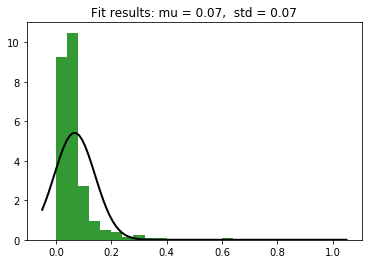

Skewness before boxcox: 5.636637095737323


In [55]:
# Plot Histogramm C1 with function
plot_hist_norm(df=data, column='C1')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(data['C1']))

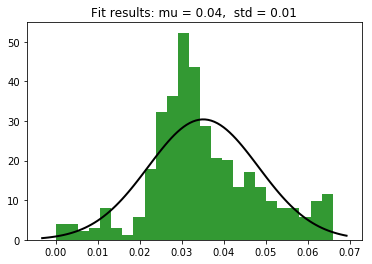

 The skewness of C1 after yeo johnson is: 0.22504273243459408


In [56]:

data['C1_yeojohnson'] = stats.yeojohnson(data['C1'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='C1_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(data['C1_yeojohnson'])
print(' The skewness of C1 after yeo johnson is:', skew(data['C1_yeojohnson']))

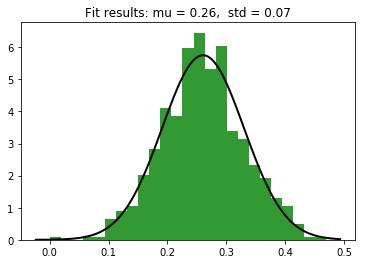

 The skewness of T2’ after yeo johnson is: 0.0009227184378491092


In [57]:

data['T2’_yeojohnson'] = stats.yeojohnson(data['T2’'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='T2’_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(data['T2’_yeojohnson'])
print(' The skewness of T2’ after yeo johnson is:', skew(data['T2’_yeojohnson']))

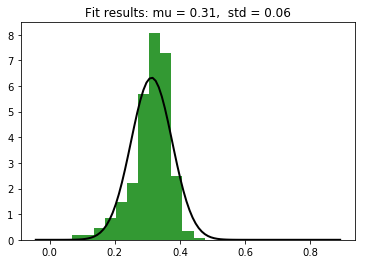

 The skewness of T3’ after yeo johnson is: 0.08925443069483148


In [58]:

data['T3’_yeojohnson'] = stats.yeojohnson(data['T3’'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='T3’_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(data['T3’_yeojohnson'])
print(' The skewness of T3’ after yeo johnson is:', skew(data['T3’_yeojohnson']))

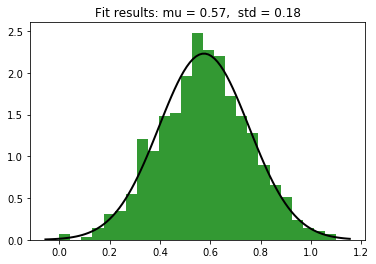

 The skewness of T4’ after yeo johnson is: -0.0032841959226532023


In [59]:

data['T4’_yeojohnson'] = stats.yeojohnson(data['T4’'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='T4’_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(data['T4’_yeojohnson'])
print(' The skewness of T4’ after yeo johnson is:', skew(data['T4’_yeojohnson']))

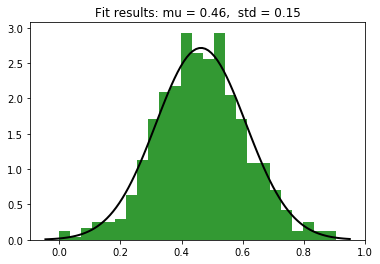

 The skewness of T5’ after yeo johnson is: 0.006731060134810057


In [60]:

data['T5’_yeojohnson'] = stats.yeojohnson(data['T5’'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='T5’_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(data['T5’_yeojohnson'])
print(' The skewness of T5’ after yeo johnson is:', skew(data['T5’_yeojohnson']))

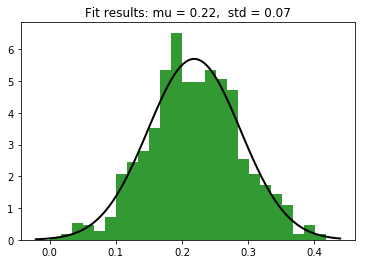

 The skewness of S1’ after yeo johnson is: 0.001388944835868419


In [61]:

data['S1’_yeojohnson'] = stats.yeojohnson(data['S1’'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='S1’_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(data['S1’_yeojohnson'])
print(' The skewness of S1’ after yeo johnson is:', skew(data['S1’_yeojohnson']))

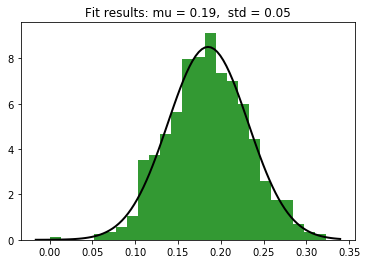

 The skewness of S2’ after yeo johnson is: 0.006072413539679163


In [62]:

data['S2’_yeojohnson'] = stats.yeojohnson(data['S2’'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='S2’_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(data['S2’_yeojohnson'])
print(' The skewness of S2’ after yeo johnson is:', skew(data['S2’_yeojohnson']))

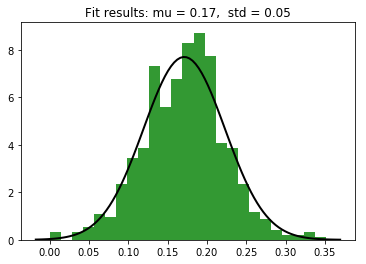

 The skewness of S3’ after yeo johnson is: -0.03355335382432651


In [63]:

data['S3’_yeojohnson'] = stats.yeojohnson(data['S3’'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='S3’_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(data['S3’_yeojohnson'])
print(' The skewness of S3’ after yeo johnson is:', skew(data['S3’_yeojohnson']))

In [64]:
# right skewed, since positive skewness, thus we can take the log to normalize
## 1. LOG

# make a copy of the dataframe to test for application of math functions
df_test = data.copy()
df_test['C1_log'] = np.log(data['C1_yeojohnson'])
## 2. LOG2
df_test['C1_log2'] =  np.log2(data['C1_yeojohnson'])
## 3. 1/x
df_test['C1_1_div_x'] = 1/(data['C1_yeojohnson'])
# square root of x
df_test['C1_sqrt'] = np.sqrt(data['C1_yeojohnson'])
# log of the square root of x
df_test['C1_log_sqrt'] = np.log(df_test['C1_sqrt'])

# print results skewness of math functions
print('Skewness log of C1_yeojohnson:', skew(df_test['C1_log']))
print('Skewness log2 of C1_yeojohnson:', skew(df_test['C1_log2']))
print('Skewness 1 divided by x of C1_yeojohnson:', skew(df_test['C1_1_div_x']))
print('Skewness square root of C1_yeojohnson:', skew(df_test['C1_sqrt']))
print('Skewness log of square root of C1_yeojohnson:', skew(df_test['C1_log_sqrt']))

# print our conclusion after testing
print('\n Transformation with additional math functions after yeojohnson leads to a higher skewness, thus not preferred!')

Skewness log of C1_yeojohnson: nan
Skewness log2 of C1_yeojohnson: nan
Skewness 1 divided by x of C1_yeojohnson: nan
Skewness square root of C1_yeojohnson: -0.9644336695933405
Skewness log of square root of C1_yeojohnson: nan

 Transformation with additional math functions after yeojohnson leads to a higher skewness, thus not preferred!


/opt/tljh/user/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/tljh/user/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/tljh/user/lib/python3.6/site-packages/scipy/stats/stats.py:1010: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


> <b> C2 - Top-tier Dummy </b>
 * Dummy variable, set to 1 if leading underwriter of IPO has a rating of 8 or higher, otherwise 0
 * NO TRANSFORMATION NEEDED ON A DUMMY VARIABLE! - included here to note why we skipped this feature

In [65]:
data['C2'].describe()

count     660 
unique    2   
top       True
freq      567 
Name: C2, dtype: object

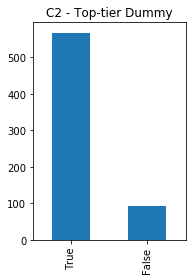

In [66]:
plt.subplot2grid((1,2), (0, 1))
data['C2'].value_counts().plot(kind='bar', title='C2 - Top-tier Dummy')

> <b> C3 - Earnings Per Share </b>
 * Trailing Earnings Per Share (EPS) at the time of the IPO (in dollars)

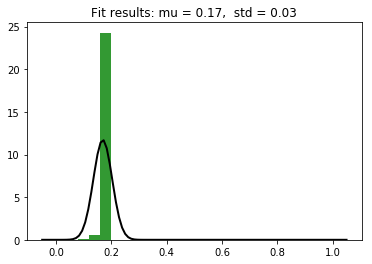

Skewness before boxcox: 21.677794614007688


In [67]:
# Plot Histogramm C1 with function
plot_hist_norm(df=data, column='C3')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(data['C3']))

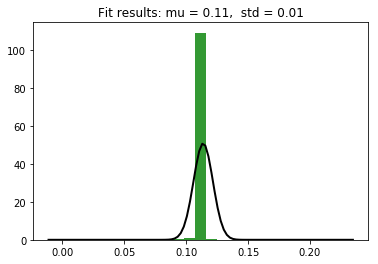

 The skewness of C3 after yeo johnson is: -4.3183437903553585


In [68]:
# add variable boxcox
data['C3_yeojohnson'] = stats.yeojohnson(data['C3'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='C3_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(data['C3_yeojohnson'])
print(' The skewness of C3 after yeo johnson is:', skew(data['C3_yeojohnson']))

> <b> C4 - Prior Nasdaq 15-day returns </b>

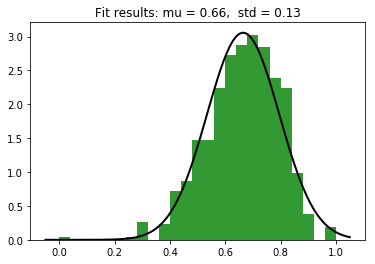

Skewness before boxcox: -0.4768056562977058


In [69]:
# Plot Histogramm C1 with function
plot_hist_norm(df=data, column='C4')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(data['C4']))

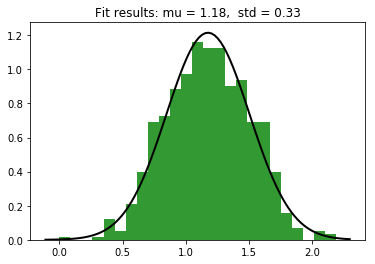

 The skewness of C4 after yeo johnson is: -0.012789840647382722


In [70]:
# add variable boxcox
data['C4_yeojohnson'] = stats.yeojohnson(data['C4'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='C4_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(data['C4_yeojohnson'])
print(' The skewness of C4 after yeo johnson is:', skew(data['C4_yeojohnson']))

> <b> C5 - Outstanding Shares </b>

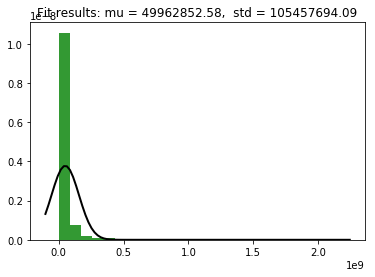

Skewness before boxcox: 13.430698280731715


In [71]:
# Plot Histogramm C5 with function
plot_hist_norm(df=data, column='C5', bin_amount=25)

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(data['C5']))

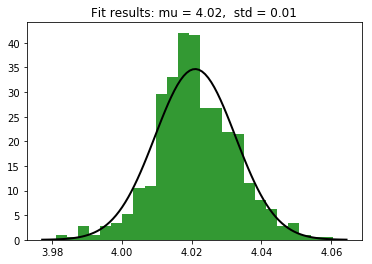

 The skewness of C5 after boxcox is: -0.03837129727888362


In [72]:
# add variable boxcox
data['C5_boxcox'] = boxcox(data['C5'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='C5_boxcox')

# print skewness of C5
skew(data['C5_boxcox'])
print(' The skewness of C5 after boxcox is:',skew(data['C5_boxcox']))

> <b> C6 - Offering Shares </b>


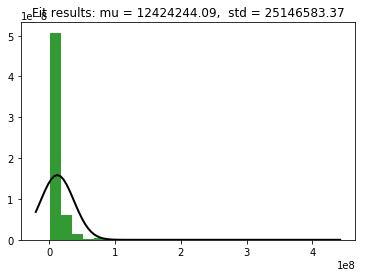

In [73]:
# Plot Histogramm C6 with function
plot_hist_norm(df=data, column='C6', bin_amount=25)

In [74]:
skew(data['C6'])

12.718562743442337

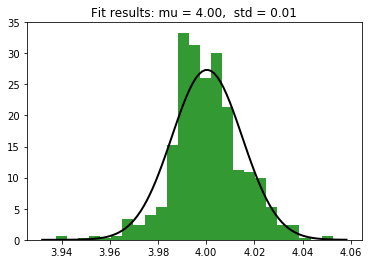

 The skewness of C6 after boxcox is: -0.07844577017022313


In [75]:
# add variable boxcox
data['C6_boxcox'] = boxcox(data['C6'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='C6_boxcox')

skew(data['C6_boxcox'])
print(' The skewness of C6 after boxcox is:',skew(data['C6_boxcox']))

> <b> C7 - Sales </b>

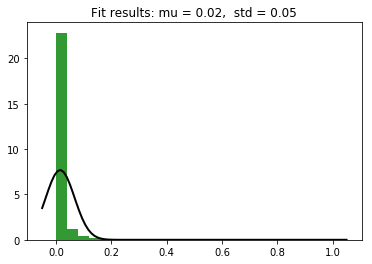

Skewness before boxcox: 12.095304276525155


In [76]:
# C7 #
# Definition: Sales - Trailing annual firm sales (in millions of dollars) at the time of the IPO

# Plot Histogramm C7 with function
plot_hist_norm(df=data, column='C7')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(data['C7']))

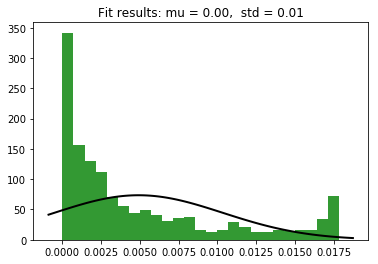

 The skewness of C7 after yeo johnson is: 1.1583319249628166


In [77]:
# add variable boxcox
data['C7_yeojohnson'] = stats.yeojohnson(data['C7'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='C7_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(data['C7_yeojohnson'])
print(' The skewness of C7 after yeo johnson is:', skew(data['C7_yeojohnson']))

> <b> C5’ - Offering Shares / Outstanding Shares </b>
 * C5’= C5/C6

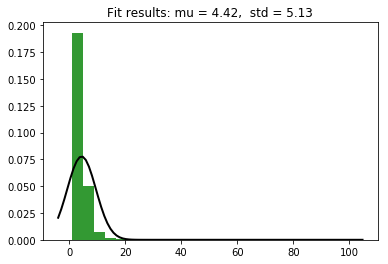

In [78]:
# Plot Histogramm C5’ with function
plot_hist_norm(df=data, column='C5’', bin_amount=25)

In [79]:
skew(data['C5’'])

13.392803454534546

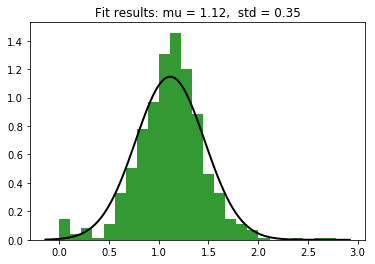

 The skewness of C5’ after boxcox is: -0.10155916744317971


In [80]:
# add variable boxcox
data['C5’_boxcox'] = boxcox(data['C5’'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='C5’_boxcox')

skew(data['C5’_boxcox'])
print(' The skewness of C5’ after boxcox is:',skew(data['C5’_boxcox']))

In [81]:
## 1. exp
#data['C5’_exp'] = np.exp(data['C5’_boxcox'])

# print results skewness of math functions
#print('Skewness exp of C5’_boxcox:', skew(data['C5’_exp']))

# conclusion exponential after boxcox did not help at all! made skewness worse!

> <b> C6’ - Up Revision </b>
 * C6’ = Set to (P(IPO) –P(mid))/P(mid) x 100%, if P(IPO) > P(mid), otherwise 0

In [82]:
data['C6’'].describe()

count    660.000000
mean     0.051587  
std      0.099062  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.076923  
max      1.000000  
Name: C6’, dtype: float64

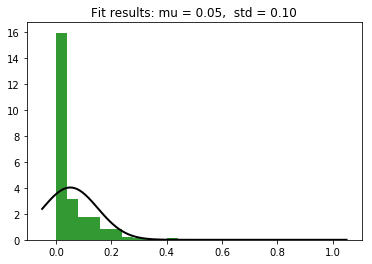

4.07859177080952

In [83]:
plot_hist_norm(df=data, column='C6’', bin_amount=25)
skew(data['C6’'])

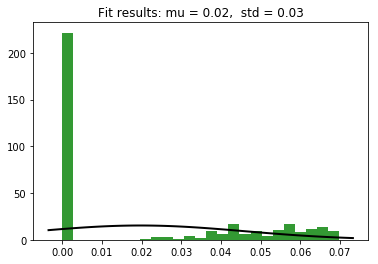

 The skewness of C6’ after boxcox is: 0.7074578610354059


In [84]:
# method ‘yeo-johnson’
data['C6’_yeo-johnson'] = stats.yeojohnson(data['C6’'])[0]

# histogram of ‘yeo-johnson’ transformation
plot_hist_norm(df=data, column='C6’_yeo-johnson')

skew(data['C6’_yeo-johnson'])
print(' The skewness of C6’ after boxcox is:',skew(data['C6’_yeo-johnson']))

> <b> T1 - Number of Sentences </b>

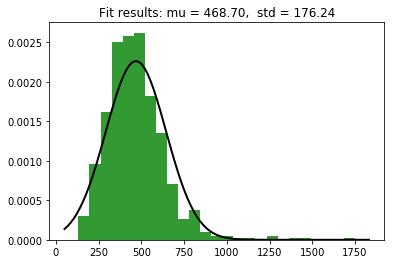

In [85]:
# Plot Histogramm T1 with function
plot_hist_norm(df=data, column='T1', bin_amount=25)

In [86]:
skew(data['T1'])

1.745749365499282

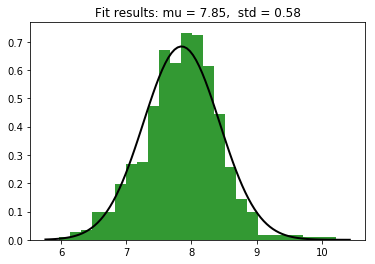

 The skewness of T1 after boxcox is: 0.006752104252470837


In [87]:
# add variable boxcox
data['T1_boxcox'] = boxcox(data['T1'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='T1_boxcox')

skew(data['T1_boxcox'])
print(' The skewness of T1 after boxcox is:',skew(data['T1_boxcox']))

> <b> T2 - Number of Words </b>

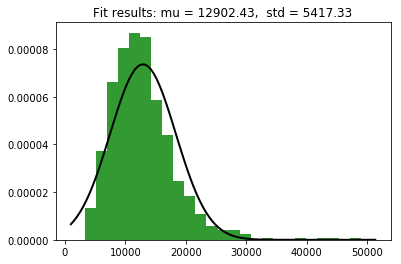

In [88]:
# Plot Histogramm T2 with function
plot_hist_norm(df=data, column='T2', bin_amount=25)

In [89]:
skew(data['T2'])

1.709071004261132

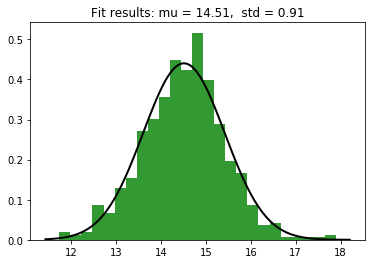

 The skewness of T2 after boxcox is: 0.005688839915148841


In [90]:
# add variable boxcox
data['T2_boxcox'] = boxcox(data['T2'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='T2_boxcox')

skew(data['T2_boxcox'])
print(' The skewness of T2 after boxcox is:',skew(data['T2_boxcox']))

> <b> T3 - Number of Real Words </b>

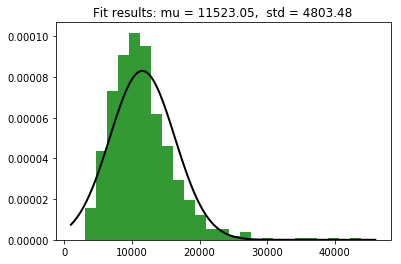

In [91]:
# Plot Histogramm T3 with function
plot_hist_norm(df=data, column='T3', bin_amount=25)

In [92]:
skew(data['T3'])

1.6963515988808442

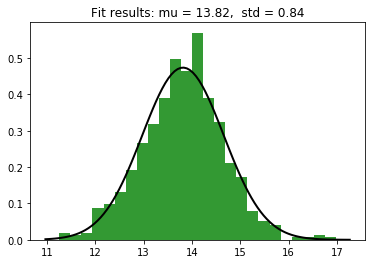

 The skewness of T3 after boxcox is: 0.004844176439632773


In [93]:
# add variable boxcox
data['T3_boxcox'] = boxcox(data['T3'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='T3_boxcox')

skew(data['T3_boxcox'])
print(' The skewness of T3 after boxcox is:',skew(data['T3_boxcox']))

> <b> T4 - Number of Long Sentences </b>

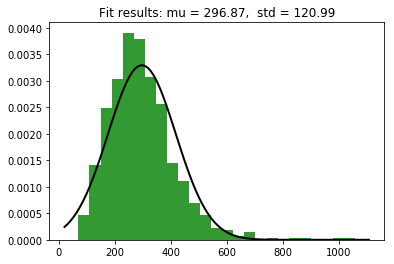

In [94]:
# T4 #

# Plot Histogramm T4 with function
plot_hist_norm(df=data, column='T4', bin_amount=25)

In [95]:
# test skewness before normalization
skew(data['T4'])

1.4776010046303818

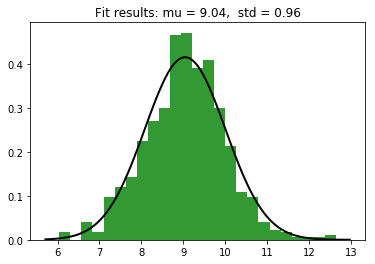

 The skewness of T4 after boxcox is: 0.009546888756811455


In [96]:
# add variable boxcox
data['T4_boxcox'] = boxcox(data['T4'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='T4_boxcox')

skew(data['T4_boxcox'])
print(' The skewness of T4 after boxcox is:', skew(data['T4_boxcox']))

> <b> T5 - Number of Long Words </b>

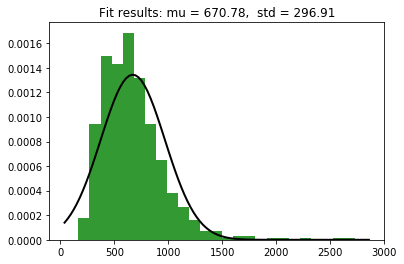

In [97]:
# T5 #

# Plot Histogramm T5 with function
plot_hist_norm(df=data, column='T5', bin_amount=25)

In [98]:
# test skewness before normalization
skew(data['T5'])

1.9269873830887172

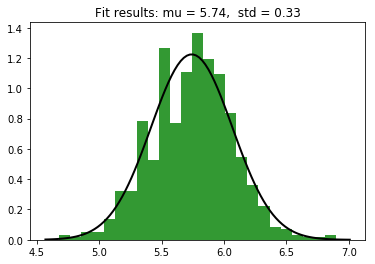

 The skewness of T5 after boxcox is: -0.0015335248942081581


In [99]:
# add variable boxcox
data['T5_boxcox'] = boxcox(data['T5'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='T5_boxcox')

skew(data['T5_boxcox'])
print(' The skewness of T5 after boxcox is:',skew(data['T5_boxcox']))

> <b> T2’ - Number of Words/Number of Sentences </b>

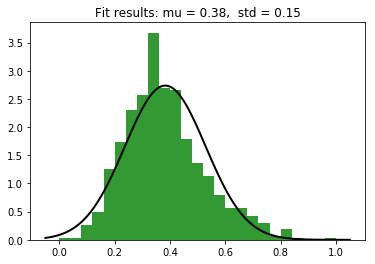

In [100]:
# Plot Histogramm T2’ with function
plot_hist_norm(df=data, column='T2’', bin_amount=25)

In [101]:
skew(data['T2’'])

0.6847950100674286

In [102]:
# add variable boxcox
#data['T2’_yeojohnson'] = yeojohnson(data['T2’'])[0]

# histogram of boxcox transformation
#plot_hist_norm(df=data, column='T2’_yeojohnson')

#skew(data['T2’_yeojohnson'])
#print(' The skewness of T2’ after yeojohnson is:',skew(data['T2’_yeojohnson']))

> <b> T3’ - Number of Real Words/Number of Words </b>

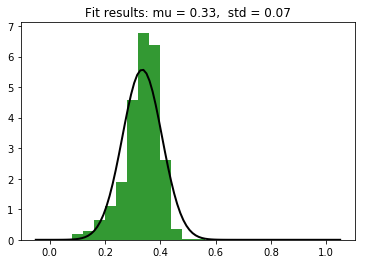

In [103]:
# Plot Histogramm T3’ with function
plot_hist_norm(df=data, column='T3’', bin_amount=25)

In [104]:
skew(data['T3’'])

0.5096106928541498

In [105]:
# add variable boxcox
#data['T3’_boxcox'] = boxcox(data['T3’'])[0]

# histogram of boxcox transformation
#plot_hist_norm(df=data, column='T3’_boxcox')

#skew(data['T3’_boxcox'])
#print(' The skewness of T3’ after boxcox is:',skew(data['T3’_boxcox']))

> <b> T4’ - Number of long sentences / Number of sentences </b>

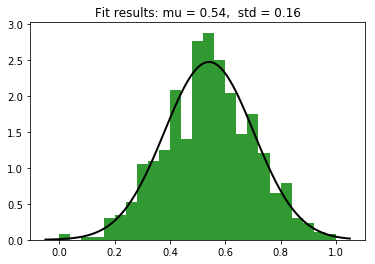

Skewness before normalization is: -0.07815658574628169


In [106]:
# histogram T4
plot_hist_norm(df=data, column='T4’', bin_amount=25)

print('Skewness before normalization is:', skew(data['T4’']))

In [107]:
# add variable boxcox
#data['T4’_boxcox'] = boxcox(data['T4’'])[0]

# histogram of boxcox transformation
#plot_hist_norm(df=data, column='T4’_boxcox')

# skewness after normalization
#skew(data['T4’_boxcox'])
#print(' The skewness of T4’ after boxcox is:',skew(data['T4’_boxcox']))

> <b> T5’ - Number of Long Words / Number of Words </b>

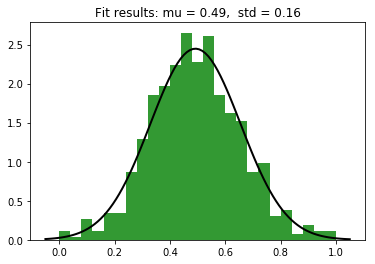

Skewness before normalization is: 0.10287024592115354


In [108]:
# T5' #

# Plot Histogramm T5' with function
plot_hist_norm(df=data, column='T5’', bin_amount=25)

print('Skewness before normalization is:', skew(data['T5’']))

In [109]:
# add variable boxcox
#data['T5’_boxcox'] = boxcox(data['T5’'])[0]

# histogram of boxcox transformation
#plot_hist_norm(df=data, column='T5’_boxcox')

#skew(data['T5’_boxcox'])
#print(' The skewness of T5’ after boxcox is:',skew(data['T5’_boxcox']))

> <b> S1 - Number of Positive Words </b>

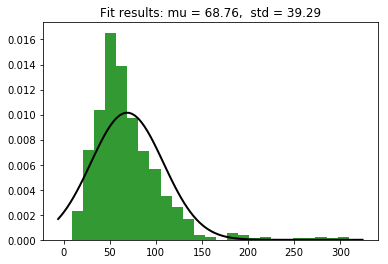

In [110]:
# S1#

# Plot Histogramm S1 with function
plot_hist_norm(df=data, column='S1', bin_amount=25)

In [111]:
skew(data['S1'])

2.325244932796299

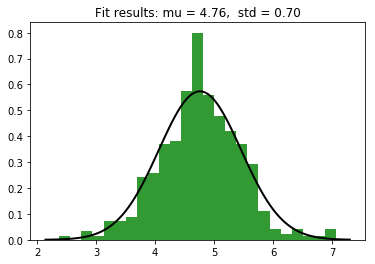

 The skewness of S1 after boxcox is: 0.009143873066367192


In [112]:
# add variable boxcox
data['S1_boxcox'] = boxcox(data['S1'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='S1_boxcox')

# skewness after normalization
skew(data['S1_boxcox'])
print(' The skewness of S1 after boxcox is:',skew(data['S1_boxcox']))

> <b> S2 - Number of Negative Words </b>

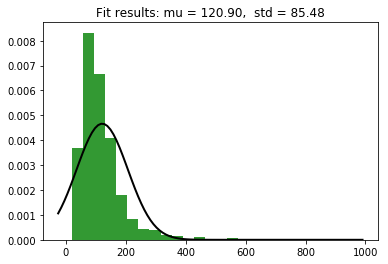

In [113]:
# S2 #

# Plot Histogramm S2 with function
plot_hist_norm(df=data, column='S2', bin_amount=25)

In [114]:
# skewness before normalization
skew(data['S2'])

3.723416369844563

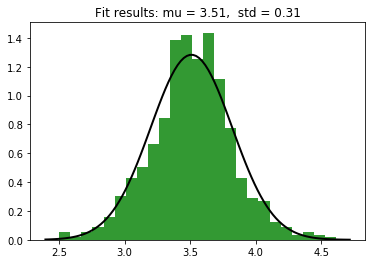

 The skewness of S2 after boxcox is: -0.013400038691380447


In [115]:
# add variable boxcox
data['S2_boxcox'] = boxcox(data['S2'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='S2_boxcox')

# skewness after normalization
skew(data['S2_boxcox'])

# print skewness after normalization
print(' The skewness of S2 after boxcox is:',skew(data['S2_boxcox']))

> <b> S3 - Number of Uncertain Words </b>

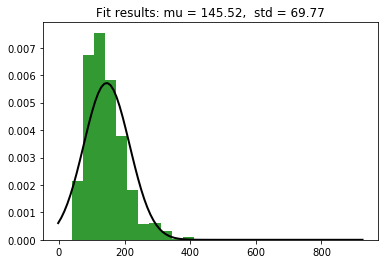

In [116]:
# S3 #

# Plot Histogramm S3 with function
plot_hist_norm(df=data, column='S3', bin_amount=25)

In [117]:
# skewness before normalization
skew(data['S3'])

3.440642519922228

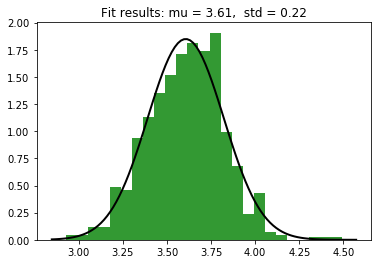

 The skewness of S3 after boxcox is: -0.008691813226962863


In [118]:
# add variable boxcox
data['S3_boxcox'] = boxcox(data['S3'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='S3_boxcox')

# skewness after normalization
skew(data['S3_boxcox'])

# print skewness after normalization
print(' The skewness of S3 after boxcox is:',skew(data['S3_boxcox']))

> <b> S1’ - Number of Positive Words / Number of Words </b>

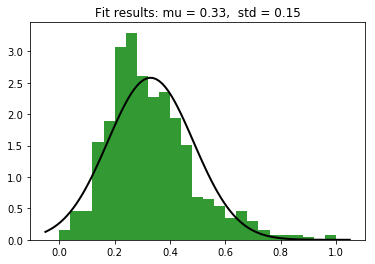

The skewness before normalization is: 0.9427001726411055


In [119]:
# S1’ #

# Plot Histogramm S1' with function
plot_hist_norm(df=data, column='S1’', bin_amount=25)

print('The skewness before normalization is:', skew(data['S1’']))

In [120]:
# add variable boxcox
#data['S1’_boxcox'] = boxcox(data['S1’'])[0]

# histogram of boxcox transformation
#plot_hist_norm(df=data, column='S1’_boxcox')

#skew(data['S1’_boxcox'])
#print('The skewness of S1’ after boxcox is:',skew(data['S1’_boxcox']))

> <b> S2’ - Number of Negative Words / Number of Words </b>

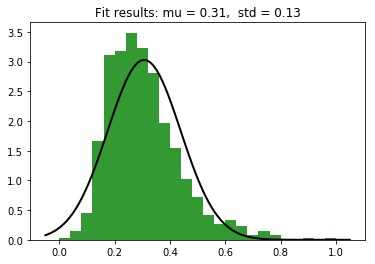

The skewness of S1’ before normalization is: 1.1727865445379244


In [121]:
# S2' #

# Plot Histogramm S2' with function
plot_hist_norm(df=data, column='S2’', bin_amount=25)

print('The skewness of S1’ before normalization is:', skew(data['S2’']))

In [122]:
# add variable boxcox
#data['S2’_boxcox'] = boxcox(data['S2’'])[0]

# histogram of boxcox transformation
#plot_hist_norm(df=data, column='S2’_boxcox')

#skew(data['S2’_boxcox'])
#print(' The skewness of S2’ after boxcox is:',skew(data['S2’_boxcox']))

> <b> S3’ - Number of Uncertain Words / Number of Words </b>

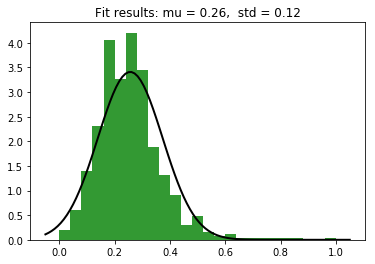

The skewness of S1’ before normalization is: 1.3875202985580395


In [123]:
# S3' 

# Plot Histogramm S3' with function
plot_hist_norm(df=data, column='S3’', bin_amount=25)

print('The skewness of S1’ before normalization is:', skew(data['S3’']))

In [124]:
# add variable boxcox
#data['S3’_boxcox'] = boxcox(data['S3’'])[0]

# histogram of boxcox transformation
#plot_hist_norm(df=data, column='S3’_boxcox')

#skew(data['S3’_boxcox'])
#print(' The skewness of S3’ after boxcox is:',skew(data['S3’_boxcox']))

##  __6: Outlier - Replacing Outlier based on Mean plus/minus 3xSt. Dev__ ##

## __NOTE TO TEAM:__ ##
<b> IMPORTANT: </b> ONLY CHOOSE ONE OF THE OUTLIER METHODS AND DON'T RUN IT MORE THAN ONCE - ELSE RESTART THE KERNEL!!!

In [125]:
# testrun for outlier column C1 with company name
data.loc[data['I2'] =='BASIC ENERGY SERVICES INC', ['C1', 'I2']]

,C1,I2
65,1.0,BASIC ENERGY SERVICES INC


In [126]:
# Create a function to calculate the lower and upper bound (mean+-3x st. dev.) to detect outliers and replace them by lower- or upper-bound
def replace_columns_outliers_stdev(df, column_list): 
    for my_col in column_list:
        u_bound = df[my_col].mean() + 3* df[my_col].std()
        l_bound = df[my_col].mean() - 3* df[my_col].std()

        df[my_col][df[my_col] > u_bound] = u_bound
        df[my_col][df[my_col] < l_bound] = l_bound

# Replace outliers by plus/minus 3 times standard deviation dependend if outlier is below or above lower/upper bound
replace_columns_outliers_stdev(df=data, column_list=['C1', 'C3', 'C4', 'C5’', 'C6’', 'C7', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’'])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
# test if outlier changed
data.loc[data['I2'] =='BASIC ENERGY SERVICES INC', ['C1', 'I2']]

,C1,I2
65,0.288002,BASIC ENERGY SERVICES INC


 ##  __6.1: Outlier IQR__(Not Used) ##

In [128]:
# TEST IQR FOR 1 COLUMN for FUNCTION
#data['C4'].describe()

In [129]:
# IQR #
# create a function for min max standardization (continuous features)
#def replace_columns_outliers_iqr(df, column_list): 
    #for my_col in column_list:
        #Q1 = df[my_col].quantile(0.25)
        #Q3 = df[my_col].quantile(0.75)
        #IQR = Q3 - Q1

        #u_bound_q3 = (Q3 + 1.5 * IQR)
        #l_bound_q1 = (Q1 - 1.5 * IQR)

        #df[my_col][df[my_col] > u_bound_q3] = u_bound_q3
        #df[my_col][df[my_col] < l_bound_q1] = l_bound_q1
    
#replace_columns_outliers_iqr(df=data, column_list=['C1', 'C3', 'C4', 'C5’', 'C6’', 'C7', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’']) 

In [130]:
# TEST IQR FOR COLUMN for FUNCTION, check if descriptives changed
#data['C4'].describe()

# __7: Correlation Analysis__ #
> (e.g., Chi-merge: χ2-based discretization)
* Supervised: use class information
* Bottom-up merge: merge the best neighboring intervals (those with similar distributions of classes, i.e., low χ2 values)
* Merge performed recursively, until a predefined stopping condition


In [131]:
# show meaning of variables again as a reminder
# df_dict

# show all dataframe columns
data.columns

Index(['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3',
       'P(mid)', 'Y1', 'Y2', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’',
       'S1’', 'S2’', 'S3’', 'C1_beforezscore', 'C1_yeojohnson',
       'T2’_yeojohnson', 'T3’_yeojohnson', 'T4’_yeojohnson', 'T5’_yeojohnson',
       'S1’_yeojohnson', 'S2’_yeojohnson', 'S3’_yeojohnson', 'C3_yeojohnson',
       'C4_yeojohnson', 'C5_boxcox', 'C6_boxcox', 'C7_yeojohnson',
       'C5’_boxcox', 'C6’_yeo-johnson', 'T1_boxcox', 'T2_boxcox', 'T3_boxcox',
       'T4_boxcox', 'T5_boxcox', 'S1_boxcox', 'S2_boxcox', 'S3_boxcox'],
      dtype='object')

# 7.1: Continuous Features - Correlation Analysis #

### Correlation Original Features (without normalization) ###

In [132]:
# define correlation matrix (absolute corr values)

# original and calculated features (before normalization)
data_corr = data[['C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'C5’', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’']] 

# define a correlation matrix
corr_matrix = data_corr.corr().abs()

# show correlation matrix
#corr_matrix

In [133]:
#source:  https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

# create a function to drop the redundant pairs in the correlation matrix (all correlations are mirrored diagionaly)
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
# show top 'n' correlations (n=50)
get_top_abs_correlations(data_corr, n=50)

# only show correlations higher or equal to 0.5
get_top_abs_correlations(data_corr, n=50)[get_top_abs_correlations(data_corr, n=50) >= 0.5]

# Our threshold is set to 0.5 for dropping either one of the highly correlated variables
# conclusion: we need to drop one of the variables in our analysis - test which one leads to a better accuracy for Y1 & Y2!
# 1. C5 - (Outstanding Shares) is highly correlated with C6 (Offering Shares) -> 0.881230
# 2. T2’ - (Number of Words/Number of Sentences) is higly correlated with T4’ (Number of Long Sentences / Number of Sentences)

Top Absolute Correlations


C5   C6     0.890700
T2’  T4’    0.872064
dtype: float64

In [134]:
# define correlation matrix (absolute corr values)

# original and calculated features (before normalization)
#data_corr = data[['C1', 'C3', 'C4', 'C7', 'C5’', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’']] 

# all the features excluding original features that where transformed and excluding boolean/binary features
data_corr = data[['C1_yeojohnson', 'C3_yeojohnson','C4_yeojohnson', 'C5_boxcox', 'C5’_boxcox', 'C6_boxcox', 'C6’_yeo-johnson', 'C7_yeojohnson', \
                  'T1_boxcox', 'T2_boxcox', 'T2’_yeojohnson', 'T3_boxcox',  'T3’_yeojohnson', 'T4_boxcox', 'T4’_yeojohnson', 'T5_boxcox', 'T5’_yeojohnson',  \
                  'S1_boxcox', 'S1’_yeojohnson', 'S2_boxcox',  'S2’_yeojohnson', 'S3_boxcox','S3’_yeojohnson']]

# define a correlation matrix
corr_matrix = data_corr.corr().abs()

# show correlation matrix
#corr_matrix

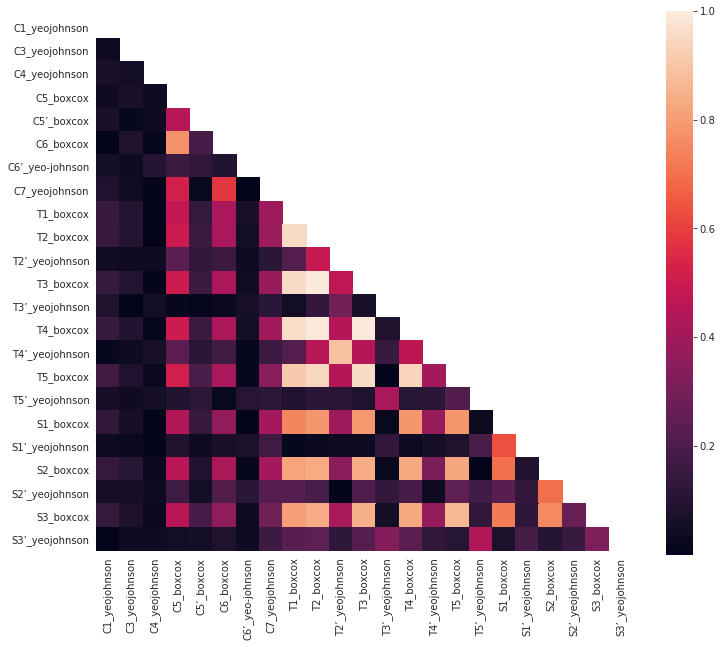

In [135]:
# 2nd heatmap without duplicates
# source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=1, square=True)

### Correlation Features after normalization ###

In [136]:
#source:  https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

# create a function to drop the redundant pairs in the correlation matrix (all correlations are mirrored diagionaly)
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
# show top 'n' correlations (n=50)
get_top_abs_correlations(data_corr, n=50)

# only show correlations higher or equal to 0.5
get_top_abs_correlations(data_corr, n=50)[get_top_abs_correlations(data_corr, n=50) >= 0.5]

# Our threshold is set to 0.5 for dropping either one of the highly correlated variables
# conclusion: we need to drop one of the variables in our analysis - test which one leads to a better accuracy for Y1 & Y2!
# 1. C5 - (Outstanding Shares) is highly correlated with C6 (Offering Shares) -> 0.881230
# 2. T2’ - (Number of Words/Number of Sentences) is higly correlated with T4’ (Number of Long Sentences / Number of Sentences)

Top Absolute Correlations


T2_boxcox       T3_boxcox         0.997402
T3_boxcox       T4_boxcox         0.991097
T2_boxcox       T4_boxcox         0.989774
T1_boxcox       T4_boxcox         0.961795
                T3_boxcox         0.959634
                T2_boxcox         0.956057
T3_boxcox       T5_boxcox         0.954348
T2_boxcox       T5_boxcox         0.947324
T4_boxcox       T5_boxcox         0.939650
T1_boxcox       T5_boxcox         0.912324
T2’_yeojohnson  T4’_yeojohnson    0.891368
T5_boxcox       S3_boxcox         0.866042
T3_boxcox       S3_boxcox         0.848243
                S2_boxcox         0.838558
T2_boxcox       S3_boxcox         0.838446
                S2_boxcox         0.834197
T4_boxcox       S3_boxcox         0.829690
                S2_boxcox         0.824790
T5_boxcox       S2_boxcox         0.823249
T1_boxcox       S2_boxcox         0.817249
                S3_boxcox         0.801916
T3_boxcox       S1_boxcox         0.791216
T2_boxcox       S1_boxcox         0.787233
T4_boxcox  

In [137]:
# simple heatmap
#ax = sns.heatmap(corr_matrix, linewidths=.5)

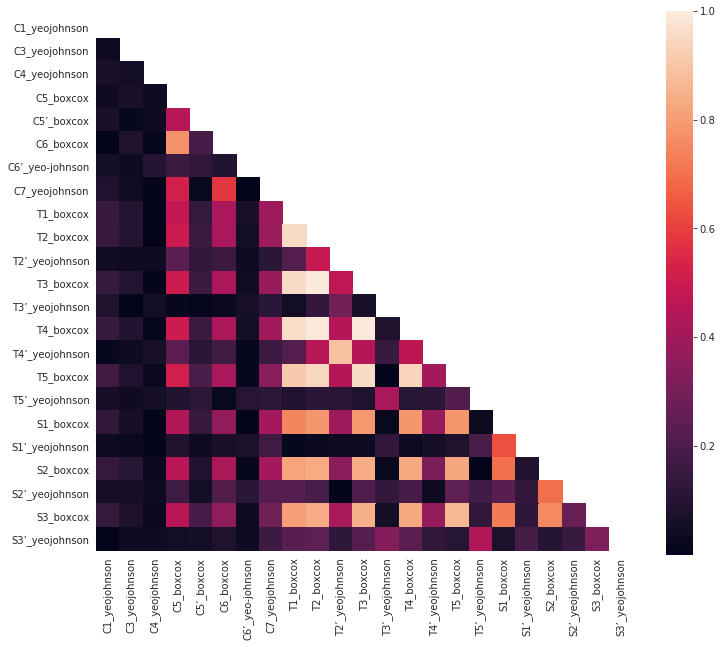

In [138]:
# 2nd heatmap without duplicates
# source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=1, square=True)

In [139]:
# -------------------------------------------------------------------------------------------------------------
# Strategy 1 for Standardization - Z-score
# -------------------------------------------------------------------------------------------------------------
# create a function for the z-score where you apply it to a list of columns on a specific dataframe you specify
#def replace_columns_zscore(df, column_list): 
    # apply z-score to column list
    #df[column_list] = df[column_list].apply(zscore)

# apply function on a specified dataframe, for a list of specified columns to replace zero's and nan's with their respective mean
#replace_columns_zscore(df=data, column_list=['C1', 'C3', 'C4', 'C7', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’']) 

# test if dataframe changed columns to z-scores
#data.head(5)

In [140]:
# -------------------------------------------------------------------------------------------------------------
# Strategy 2 for Standardization - Min-Max 
# -------------------------------------------------------------------------------------------------------------
# source: https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn
# formula: (x-min_x)/(max_x - min_x)

# create a function for min max standardization (continuous features)
#def replace_columns_minmax(df, column_list): 
    # transform using min max function from sklearn.preprocessing.minmax
    #df[column_list] = scaler.fit_transform(df[column_list])

# use min-max scalar on continuous features
#replace_columns_minmax(df=data, column_list=['C1', 'C3', 'C4', 'C7', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’']) 

# show dataframe
#data.head(5)

# 7.2: Categorical Features - Correlation Analysis #

In [141]:
# enter code here
# use chi squared

# __8: Binning - Categorical__
> For categorical data, you might want to recode them. 
<br> For instance, since you need to use AUC as the evaluation metric, you should convert the target(s) to binary (two classes). 
<br> Also, you should recode any categorical variable(s) with no more than 5 classes.

## <b> 8.1 Binning SIC Codes </b> ##

In [142]:
# Bin SIC Codes - create new column with INDUSTRY based SIC Codes
# Source: https://en.wikipedia.org/wiki/Standard_Industrial_Classification

## creating a function for binning SIC Codes into categories
def assign_sic_category(sic_code_string):
    try:
        # convert string to integer
        sic_code = int(sic_code_string)

        if sic_code >= 100 and sic_code <= 999:             # 0100-0999 Agriculture, Forestry and Fishing
            return('Agriculture, Forestry and Fishing')
        elif sic_code >= 1000 and sic_code <= 1499:         # 1000-1499 Mining
            return('Mining')
        elif sic_code >= 1500 and sic_code <= 1799:         # 1500-1799 Construction
            return('Construction')             
        elif sic_code >= 1800 and sic_code <= 1999:         # 1800-1999 not used  
            return('not used')
        elif sic_code >= 2000 and sic_code <= 3999:         # 2000-3999 Manufacturing
            return('Manufacturing')
        elif sic_code >= 4000 and sic_code <= 4999:         # 4000-4999 Transportation, Communications, Electric, Gas and Sanitary service
            return('Transportation, Communications, Electric, Gas and Sanitary service') 
        elif sic_code >= 5000 and sic_code <= 5199:         # 5000-5199 Wholesale Trade
            return('Wholesale Trade')
        elif sic_code >= 5200 and sic_code <= 5999:         # 5200-5999 Retail Trade
            return('Retail Trade')
        elif sic_code >= 6000 and sic_code <= 6799:         # 6000-6799 Finance, Insurance and Real Estate
            return('Finance, Insurance and Real Estate')
        elif sic_code >= 7000 and sic_code <= 8999:         # 7000-8999 Services
            return('Services')
        elif sic_code >= 9100 and sic_code <= 9729:         # 9100-9729 Public Administration
            return('Public Administration')
        elif sic_code >= 9900 and sic_code <= 9999:         # 9900-9999 Nonclassifiable
            return('Nonclassifiable')
        else:
            return None
    except:
        print('Error - The Sic Code(s) in the dataset cannnot be converted to an integer!') 
    
# Creating a new column called 'SIC_category' in the dataframe and bin the SIC codes using the function above    
data['SIC_category'] = data['I3'].apply(assign_sic_category)  

# test if new column has been made with different categories
data.head(10)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6’_yeo-johnson,T1_boxcox,T2_boxcox,T3_boxcox,T4_boxcox,T5_boxcox,S1_boxcox,S2_boxcox,S3_boxcox,SIC_category
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,0.053924,True,0.169794,...,0.05436,7.948974,14.644217,13.976329,9.234193,5.833022,4.789451,3.594124,3.633993,Manufacturing
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,0.119884,False,0.168708,...,-0.00000,8.818507,15.895945,15.122830,10.580870,6.213724,4.971579,3.978589,3.903967,Manufacturing
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,0.038517,True,0.168790,...,-0.00000,6.605610,12.714854,12.164010,7.274044,5.228156,4.767718,2.835791,3.168751,Manufacturing
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,0.095811,True,0.168861,...,-0.00000,7.368920,13.681836,13.091454,7.986254,5.590534,5.133388,3.198756,3.509516,Manufacturing
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,0.033702,True,0.169072,...,0.03510,8.272798,14.995246,14.256336,9.505998,5.866735,4.893451,3.725898,3.728984,"Transportation, Communications, Electric, Gas and Sanitary service"
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,0.040443,True,0.169070,...,-0.00000,8.083023,15.444687,14.376940,9.446052,5.964618,4.789451,3.483317,3.769938,Services
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,0.056813,True,0.168655,...,-0.00000,8.033927,15.135293,14.379885,9.808992,5.842159,5.167036,3.539161,3.618668,Manufacturing
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,0.038999,False,0.168898,...,-0.00000,7.397754,14.362203,13.681295,9.023224,5.702841,4.629918,3.608109,3.565068,Manufacturing
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,0.043332,True,0.168947,...,-0.00000,8.407134,14.992607,14.302732,9.498571,6.057349,4.700475,3.626157,3.897739,Services
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,0.046221,True,0.169377,...,-0.00000,7.625234,13.903063,13.231744,8.241175,5.507525,5.150309,3.446575,3.663200,Manufacturing


In [143]:
# count unique categories for dataframe
print('There are', data['SIC_category'].nunique(), 'unique categories for SIC codes!')

# count the number of sic_codes per category/bin and sort them descending
data.groupby(['SIC_category'])['I3'].agg(['count']).sort_values(by=['count'], ascending=False)

There are 9 unique categories for SIC codes!


,count
SIC_category,
Manufacturing,298
Services,202
"Transportation, Communications, Electric, Gas and Sanitary service",58
Retail Trade,50
Mining,31
Wholesale Trade,14
"Finance, Insurance and Real Estate",5
"Agriculture, Forestry and Fishing",1
Construction,1


In [144]:
# --------------------------------------------------------------------------------------------
# Goal: Visually Inspect how balanced the dataset is for Y1 & Y2 True/False values by SIC Code Category
# --------------------------------------------------------------------------------------------
# create a multi-indexed dataframe for Y1 - group by SIC code category and how many True/False
df_sic_y1 = data.groupby(['SIC_category', 'Y1'])['Y1'].agg(['count'])

# create a multi-indexed dataframe for Y2 - group by SIC code category and how many True/False
df_sic_y2 = data.groupby(['SIC_category', 'Y2'])['Y2'].agg(['count'])

# combined dataframes Y1 & Y2 grouped by SIC Code category and True/False
df_sic_y1_y2 = pd.concat([df_sic_y1, df_sic_y2], axis=1)

# rename column headers of multi-index dataframe
df_sic_y1_y2.columns = ['Y1_count', 'Y2_count']

# show dataframe with Y1/Y2 True and False by SIC Code Category
df_sic_y1_y2

Y1_count  \
Agriculture, Forestry and Fishing                                  False NaN         
                                                                   True   1.0        
Construction                                                       True   1.0        
Finance, Insurance and Real Estate                                 False  4.0        
                                                                   True   1.0        
Manufacturing                                                      False  139.0      
                                                                   True   159.0      
Mining                                                             False  14.0       
                                                                   True   17.0       
Retail Trade                                                       False  34.0       
                                                                   True   16.0       
Services                                                           False  107.0      
                                                                   True   95.0       
Transportation, Communications, Electric, Gas and Sanitary service False  25.0       
                                                                   True   33.0       
Wholesale Trade                                                    False  7.0        
                                                                   True   7.0        

                                                                          Y2_count  
Agriculture, Forestry and Fishing                                  False  1.0       
                                                                   True  NaN        
Construction                                                       True   1.0       
Finance, Insurance and Real Estate                                 False  1.0       
                                                                   True   4.0       
Manufacturing                                                      False  85.0      
                                                                   True   213.0     
Mining                                                             False  18.0      
                                                                   True   13.0      
Retail Trade                                                       False  14.0      
                                                                   True   36.0      
Services                                                           False  49.0      
                                                                   True   153.0     
Transportation, Communications, Electric, Gas and Sanitary service False  26.0      
                                                                   True   32.0      
Wholesale Trade                                                    False  5.0       
                                                                   True   9.0

In [145]:
# ----------------------------------------------------
# Strategy 1 - Aggregate groups and Bin them
# ----------------------------------------------------
# It would make sense to aggregate further, to reduce the number of categories and bin the less frequent occurrences together

# For example:
# Category 1: Manufacturing
# Category 2: (Services+Transport... service)
# Category 3: (Retail Trade + Wholesale Trade)
# Category 4: Other

# ----------------------------------------------------
# Strategy 2 - Bin each category as Binary (1 or 0)
# ----------------------------------------------------

# First create a function to return 1 if value equals SIC category predefined by user, for example: 'Manufacturing' ELSE return 0
def assign_sic_bin(sic_category, category):
    if sic_category is category:
        return(1)
    else:
        return(0)

# Then create new columns for each SIC Category and make it binary by applying the previous function
# note: not very useful probably some columns because they have too few observations but we can deal with that with feature selection later
data['SIC_Manufacturing'] = data['SIC_category'].apply(assign_sic_bin, category='Manufacturing').astype(int)   
data['SIC_Services'] = data['SIC_category'].apply(assign_sic_bin, category='Services').astype(int)     
data['SIC_Transport'] = data['SIC_category'].apply(assign_sic_bin, category='Transportation, Communications, Electric, Gas and Sanitary service').astype(int)     
data['SIC_RetailTrade'] = data['SIC_category'].apply(assign_sic_bin, category='Retail Trade').astype(int) 
data['SIC_Mining'] = data['SIC_category'].apply(assign_sic_bin, category='Mining').astype(int)
data['SIC_WholesaleTrade'] = data['SIC_category'].apply(assign_sic_bin, category='Wholesale Trade').astype(int)
data['SIC_Finance'] = data['SIC_category'].apply(assign_sic_bin, category='Finance, Insurance and Real Estate').astype(int)
data['SIC_Construction'] = data['SIC_category'].apply(assign_sic_bin, category='Construction').astype(int)
data['SIC_Agriculture'] = data['SIC_category'].apply(assign_sic_bin, category='Agriculture, Forestry and Fishing').astype(int)

# test by visually inspecting first n rows in df (n=3) if new columns are added to the dataframe
data.head(3)

# test if datatypes are all boolean of new columns (which are the last 9 columns)
data.iloc[:,-9:].dtypes

SIC_Manufacturing     int64
SIC_Services          int64
SIC_Transport         int64
SIC_RetailTrade       int64
SIC_Mining            int64
SIC_WholesaleTrade    int64
SIC_Finance           int64
SIC_Construction      int64
SIC_Agriculture       int64
dtype: object

## <b> 8.2 Binning Company Names </b> ##

In [146]:
# ---------------------------------------------------------------------------------------------------------------------------------------------
# I2 - Company Name => Recode column
# ---------------------------------------------------------------------------------------------------------------------------------------------
# by extracting text: INC, INC. CO, CORP, Ltd, LTD, LLC, N.V., L.P. (exception companies examples: 'Fabrinet', 'TELVENT GIT S A', 'CREATIVE REALITIES,' )
# use regex [space]&pattern to find
# source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
# example bin them binary by column (INC/CO/LTD/OTHER based on how many observations in each category)
# or label them 1,2,3,4,5 in one column (to help against the curse of dimentionality)

# Inc
data['I2_inc'] = np.where((data['I2'].str.contains(" inc$| inc.$| Inc.$|Inc.\s| inc\s", regex=True, case=False)), 1, 0)

# CO
data['I2_co'] = np.where((data['I2'].str.contains(" co$| co.$| corp.$| corp$| co\s$| corp\s$| corp.\s$", regex=True, case=False)), 1, 0)
data[['I2', 'I2_inc', 'I2_co']].head(15)

# LTD
data['I2_ltd'] = np.where((data['I2'].str.contains(" ltd$| ltd.$| ltd\s| ltd.\s$", regex=True, case=False)), 1, 0)

# print number of rows for INC, CO, LTD
print('Number of rows with variations of INC:', data['I2_inc'].sum())
print('Number of rows with variations of CO:', data['I2_co'].sum())
print('Number of rows with variations of LTD:', data['I2_ltd'].sum())
print('Number of rows remaining:', data[data['I2_inc']+data['I2_co']+data['I2_ltd'] < 1]['I2'].count())

# test number of rows where non-exclusive inc, co, ltd, if dummy variables per row add up to more than 1
data[data['I2_inc']+data['I2_co']+data['I2_ltd'] > 1]

# show remaining without pattern included
data[data['I2_inc']+data['I2_co']+data['I2_ltd'] < 1][['I2', 'I2_inc', 'I2_co', 'I2_ltd']]

# show added dummy variables
#data[['I2', 'I2_inc', 'I2_co', 'I2_ltd']].tail(15)

Number of rows with variations of INC: 508
Number of rows with variations of CO: 104
Number of rows with variations of LTD: 28
Number of rows remaining: 20


,I2,I2_inc,I2_co,I2_ltd
175,Dolan Co.,0,0,0
191,"DreamWorks Animation, LLC",0,0,0
234,Fabrinet,0,0,0
285,CASCAL N.V.,0,0,0
294,"INTERLINE BRANDS, INC./DE",0,0,0
361,Manchester United plc,0,0,0
396,METALS USA HOLDINGS,0,0,0
412,Nielsen Holdings plc,0,0,0
425,NXP Semiconductors N.V.,0,0,0
468,PRA International,0,0,0


In [147]:
# Convert datatype
data['I2_inc'].astype(int)
data['I2_co'].astype(int)
data['I2_ltd'].astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
677    0
678    0
679    0
680    0
681    0
Name: I2_ltd, Length: 660, dtype: int64

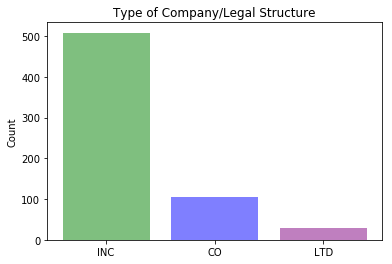

In [148]:
# Plot a Barchart / Visualize categories of type of company
# source: https://pythonspot.com/matplotlib-bar-chart/

# data to plot
# get the aggregate sum of a dummy variable set equal to 1 for inc, co, ltd, respectively
count_inc = data['I2_inc'].sum()
count_co = data['I2_co'].sum()
count_ltd = data['I2_ltd'].sum()

# define the categories
objects = ('INC', 'CO', 'LTD')
y_pos = np.arange(len(objects))
x_s = [count_inc, count_co, count_ltd]

# plot the barchart with x variables, alpha = set to opaqueness, colors are defined for each category
plt.bar(y_pos, x_s, align='center', alpha=0.5, color=('green', 'blue', 'purple'))
plt.xticks(y_pos, objects)
plt.ylabel('Count') # set the y label
plt.title('Type of Company/Legal Structure') # set the title of the barchart
plt.show() # plot the graph

In [149]:
# Create a table whereby you can visually inspect how balanced the Y1 True/False are for each category (inc/co/ltd)
df_inc_y1 = data.groupby(['I2_inc', 'Y1'])['Y1'].agg(['count'])
df_co_y1 = data.groupby(['I2_co', 'Y1'])['Y1'].agg(['count'])
df_ltd_y1 = data.groupby(['I2_ltd', 'Y1'])['Y1'].agg(['count'])

# combine 3 dataframes
df_y1_combined = pd.concat([df_inc_y1, df_co_y1, df_ltd_y1], axis=1)

# rename columns
df_y1_combined.columns = ['inc', 'co', 'ltd']

# show for each category how many are false/true for Y1
# to inspect if there are more true/false in one of the categories for Y1, to inspect which category could be a good predictor for Y1
df_y1_combined

# for example if a company is incorporated, there are 508 total of which 259 have a False/zero for underpricing and 249 which have True/1, for the ones that are not inc, there are 71 that are False/0 and thus not underpriced and 81 are underpriced
# conclusion: there are slightly less incorporated companies underpriced, there are slightly more corporations underpriced and slightly more ltd's underpriced
# these variables might help in the explanatory power for target variable: Y1 (Pre-IPO Price Revision)

inc   co  ltd
I2_inc Y1                  
0      False  71   280  319
       True   81   276  313
1      False  259  50   11 
       True   249  54   17

In [150]:
# Create a table whereby you can visually inspect how balanced the Y2 True/False are for each category (inc/co/ltd)
df_inc_y2 = data.groupby(['I2_inc', 'Y2'])['Y2'].agg(['count'])
df_co_y2 = data.groupby(['I2_co', 'Y2'])['Y2'].agg(['count'])
df_ltd_y2 = data.groupby(['I2_ltd', 'Y2'])['Y2'].agg(['count'])

# combine 3 dataframes
df_y2_combined = pd.concat([df_inc_y2, df_co_y2, df_ltd_y2], axis=1)

# rename columns
df_y2_combined.columns = ['inc', 'co', 'ltd']
df_y2_combined

# conclusion: these dummy variables might help as predictors for Y2 (Post-IPO Initial Return)
# but feature selection in the next chapter will examine if they are included in our final model

inc   co  ltd
I2_inc Y2                  
0      False  53   161  191
       True   99   395  441
1      False  146  38   8  
       True   362  66   20

## <b> 8.2 Binning C1_boxcox </b> ##
> <b> binning in 2 up to 5 bins </b>

In [151]:
print(data['C1_beforezscore'].describe())
print('median C1 before z-score, but after outlier iqr and normalization:', data['C1_beforezscore'].median())

count    660.000000 
mean     149.728788 
std      152.817467 
min      10.000000  
25%      85.000000  
50%      107.000000 
75%      155.250000 
max      2087.000000
Name: C1_beforezscore, dtype: float64
median C1 before z-score, but after outlier iqr and normalization: 107.0


In [152]:
# Binning C1 #
# Binning C1_boxcox in either 2,3,4,5 bins
data['C1_binned_2'] = pd.qcut(data['C1_yeojohnson'], q=2, labels=False)
data['C1_binned_3'] = pd.qcut(data['C1_yeojohnson'], q=3, labels=False)
data['C1_binned_4'] = pd.qcut(data['C1_yeojohnson'], q=4, labels=False)
data['C1_binned_5'] = pd.qcut(data['C1_yeojohnson'], q=5, labels=False)

> <b> binning binary (more or less than median days) </b>

In [153]:
# create new binary variable for C1
data['C1_more_than_median_days_binary'] = np.where((data['C1_beforezscore'] > data['C1_beforezscore'].median()), 1, 0)

# show number in each class (binary, either 1 OR 0), where 1 is when Days is > median, ELSE 0 
data['C1_more_than_median_days_binary'].value_counts()

# conclusion: variable doesn't help in current most optimal models for Y1 or Y2 for F1-score improvement

0    333
1    327
Name: C1_more_than_median_days_binary, dtype: int64

> <b> binning binary (more or less than mean days) </b>

In [154]:
# create new binary variable for C1
data['C1_more_than_mean_days_binary'] = np.where((data['C1_beforezscore'] > data['C1_beforezscore'].mean()), 1, 0)
data['C1_more_than_mean_days_binary'].value_counts()

0    482
1    178
Name: C1_more_than_mean_days_binary, dtype: int64

> <b> binning binary (more or less than x days) </b>

In [155]:
# create new binary variable for C1
data['C1_more_than_60_days_binary'] = np.where((data['C1_beforezscore'] > 60), 1, 0)
data['C1_more_than_60_days_binary'].value_counts()

# conclusion: variable doesn't help improve - but score stays the same for optimal models for Y1 and F-1 score becomes lower for Y2

1    612
0    48 
Name: C1_more_than_60_days_binary, dtype: int64

In [156]:
# create new binary variable for C1
data['C1_more_than_90_days_binary'] = np.where((data['C1_beforezscore'] > 90), 1, 0)

data['C1_more_than_90_days_binary'].value_counts()

1    456
0    204
Name: C1_more_than_90_days_binary, dtype: int64

In [157]:
# create new binary variable for C1
data['C1_more_than_15_days_binary'] = np.where((data['C1_beforezscore'] > 15), 1, 0)
data['C1_more_than_15_days_binary'].value_counts()

1    653
0    7  
Name: C1_more_than_15_days_binary, dtype: int64

In [158]:
# create new binary variable for C1
data['C1_more_than_40_days_binary'] = np.where((data['C1_beforezscore'] > 40), 1, 0)
data['C1_more_than_40_days_binary'].value_counts()

1    623
0    37 
Name: C1_more_than_40_days_binary, dtype: int64

In [159]:
# create new binary variable for C1
data['C1_more_than_45_days_binary'] = np.where((data['C1_beforezscore'] > 45), 1, 0)
data['C1_more_than_45_days_binary'].value_counts()

1    619
0    41 
Name: C1_more_than_45_days_binary, dtype: int64

In [160]:
# create new binary variable for C1
data['C1_more_than_35_days_binary'] = np.where((data['C1_beforezscore'] > 35), 1, 0)
data['C1_more_than_35_days_binary'].value_counts()

1    636
0    24 
Name: C1_more_than_35_days_binary, dtype: int64

In [161]:
# create new binary variable for C1
data['C1_more_than_37_days_binary'] = np.where((data['C1_beforezscore'] > 37), 1, 0)
data['C1_more_than_37_days_binary'].value_counts()

1    630
0    30 
Name: C1_more_than_37_days_binary, dtype: int64

In [162]:
# create new binary variable for C1
data['C1_more_than_42_days_binary'] = np.where((data['C1_beforezscore'] > 42), 1, 0)
data['C1_more_than_42_days_binary'].value_counts()

1    620
0    40 
Name: C1_more_than_42_days_binary, dtype: int64

In [163]:
# create new binary variable for C1
data['C1_more_than_39_days_binary'] = np.where((data['C1_beforezscore'] > 39), 1, 0)
data['C1_more_than_39_days_binary'].value_counts()

1    624
0    36 
Name: C1_more_than_39_days_binary, dtype: int64

In [164]:
# create new binary variable for C1
data['C1_more_than_56_days_binary'] = np.where((data['C1_beforezscore'] > 56), 1, 0)
data['C1_more_than_56_days_binary'].value_counts()

1    616
0    44 
Name: C1_more_than_56_days_binary, dtype: int64

In [165]:
# create new binary variable for C1
data['C1_more_than_100_days_binary'] = np.where((data['C1_beforezscore'] > 100), 1, 0)
data['C1_more_than_100_days_binary'].value_counts()

1    369
0    291
Name: C1_more_than_100_days_binary, dtype: int64

## <b> 8.3 Binning C3_yeojohnson </b> ##
> <b> binning in 2 up to 5 bins </b>

In [166]:
# Bin in 2,3,4,5 categories for C3_yeojohnson
data['C3_binned_2'] = pd.qcut(data['C3_yeojohnson'], q=2, labels=False)
data['C3_binned_3'] = pd.qcut(data['C3_yeojohnson'], q=3, labels=False)
data['C3_binned_4'] = pd.qcut(data['C3_yeojohnson'], q=4, labels=False)
data['C3_binned_5'] = pd.qcut(data['C3_yeojohnson'], q=5, labels=False)

## <b> 8.4 Binning C7_yeojohnson </b> ##
> <b> binning in 2 up to 5 bins </b>

In [167]:
# Bin in 2,3,4,5 categories
data['C7_binned_2'] = pd.qcut(data['C7_yeojohnson'], q=2, labels=False)
data['C7_binned_3'] = pd.qcut(data['C7_yeojohnson'], q=3, labels=False)
data['C7_binned_4'] = pd.qcut(data['C7_yeojohnson'], q=4, labels=False)
data['C7_binned_5'] = pd.qcut(data['C7_yeojohnson'], q=5, labels=False)

# __9: Feature Selection__

In [168]:
# Find the columns for Y1 & Y2

#show all column names in dataframe
#data.columns
#list(data.columns)[:]

# get column for Y1 => 23
print(list(data.columns)[23])

# get column for Y2 => 24
print(list(data.columns)[24])

Y1
Y2


## 9.1 Y1 - RFE Feature Selection ##

In [169]:
# DataFrame object to a NumPy array
dataframe = data
array = dataframe.values

# ---------------------------------
# Define dependent variables
# ---------------------------------
## create a list of all the columns
list_all_columns = data.columns.tolist()

## remove features in list, which are not needed for testing for feature selection, namely:
### 1. Features that are used for calculating Y1 & Y2
### 2. Independent variables (target variables)
### 2. Features with datatype text/string
# source: https://stackoverflow.com/questions/11434599/remove-list-from-list-in-python

# create a list whereby you remove features
#list_remove_feature = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'I1', 'I2', 'I3', 'SIC_category', 'Y1', 'Y2'] # include all other variables
#list_remove_feature = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'I1', 'I2', 'I3', 'SIC_category', 'Y1', 'Y2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'S3'] # remove all original variables
list_remove_feature = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'P(mid)', 'I1', 'I2', 'I3', 'SIC_category', 'Y1', 'Y2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'S3', 'S1', 'S2', 'S3', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’'] # remove all original and calculated T & S & C variables
# Create sets of a,b
setA = set(list_all_columns)
setB = set(list_remove_feature)

# Get new set with elements that are only in a but not in b
setlist_test_columns = setA.difference(list_remove_feature)

# convert set object to a list
list_test_columns = list(setlist_test_columns)
#list_test_columns = list_all_columns.remove(['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'I1', 'I2', 'I3', 'Y1', 'Y2'])

# give a list of column names to define X variables
#list_test_columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’', 'C1_boxcox', 'C5’_boxcox', 'SIC_Manufacturing', 'SIC_Services']
#list_test_columns = ['C2', 'C4', 'C7', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’', 'C1_boxcox', 'C5’_boxcox', 'SIC_Manufacturing', 'SIC_Services']

# Define dependent variables
X = data[list_test_columns].to_numpy()

# ---------------------------------
# Define independent variable
# ---------------------------------
Y = array[:, 23] #target
Y = Y.astype('int')

In [170]:
# show list_test_columns
# columns to test with feature selection
list_test_columns

['SIC_Agriculture',
 'SIC_Transport',
 'C3_binned_5',
 'C7_binned_3',
 'C1_yeojohnson',
 'C1_more_than_median_days_binary',
 'C3_yeojohnson',
 'T1_boxcox',
 'C3_binned_2',
 'SIC_Services',
 'T2_boxcox',
 'SIC_WholesaleTrade',
 'S1_boxcox',
 'S3_boxcox',
 'C1_more_than_15_days_binary',
 'T3’_yeojohnson',
 'C1_binned_5',
 'SIC_RetailTrade',
 'SIC_Manufacturing',
 'S3’_yeojohnson',
 'C7_binned_5',
 'C4_yeojohnson',
 'I2_inc',
 'SIC_Mining',
 'T5’_yeojohnson',
 'I2_co',
 'T4’_yeojohnson',
 'C3_binned_4',
 'T4_boxcox',
 'C6’_yeo-johnson',
 'C1_binned_4',
 'C7_binned_4',
 'C1_more_than_60_days_binary',
 'C1_more_than_37_days_binary',
 'T5_boxcox',
 'C1_more_than_mean_days_binary',
 'C1_more_than_42_days_binary',
 'C7_binned_2',
 'S2_boxcox',
 'C5’_boxcox',
 'T3_boxcox',
 'C1_more_than_100_days_binary',
 'C1_binned_2',
 'C5_boxcox',
 'C1_more_than_35_days_binary',
 'C1_more_than_90_days_binary',
 'C1_more_than_40_days_binary',
 'T2’_yeojohnson',
 'C1_binned_3',
 'C7_yeojohnson',
 'C1_more_tha

In [171]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Num Features: 5
Selected Features: [False False False False False False False  True False False False False
 False False False  True False False False False False False False False
  True False False False False  True False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False]
Feature Ranking: [57 56 28 22 51 21 41  1 39 46  8 55 20 18 26  1 30 54 45 32 35  5 50 43
  1 34  4 29 37  1 47 48 16 27 15 24  2 23  1 12  7 31  9 36 49 33 40 44
 10 42 17 53 38 52  3 25  6 19 11 14 13]


/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [172]:
# --------------------------------------------------------
# Get the column names and the ranking in a new dataframe
# --------------------------------------------------------

# convert numpy array to list
list_ranking = fit.ranking_.tolist()

# convert 2 lists into a dictionary
dict_ranking = {'Feature': list_test_columns, 'RFE Rank': list_ranking}

# convert the dictionary into a pandas dataframe
df_test_ranking = pd.DataFrame(dict_ranking)

df_test_ranking.set_index('Feature', inplace=True)

# show dataframe
df_test_ranking

# order by rank
print('RFE Feature selection for Y1')
df_test_ranking.sort_values(by=['RFE Rank'], ascending=True)

RFE Feature selection for Y1


,RFE Rank
Feature,
T5’_yeojohnson,1
S2_boxcox,1
T1_boxcox,1
C6’_yeo-johnson,1
T3’_yeojohnson,1
...,...
SIC_Finance,53
SIC_RetailTrade,54
SIC_WholesaleTrade,55


## 9.2 Y2 - RFE Feature Selection ##

In [173]:
# DataFrame object to a NumPy array
dataframe = data
array = dataframe.values

# ---------------------------------
# Define dependent variables
# ---------------------------------
## create a list of all the columns
list_all_columns = data.columns.tolist()

## remove features in list, which are not needed for testing for feature selection, namely:
### 1. Features that are used for calculating Y1 & Y2
### 2. Independent variables (target variables)
### 2. Features with datatype text/string
# source: https://stackoverflow.com/questions/11434599/remove-list-from-list-in-python

# create a list whereby you remove features
#list_remove_feature = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'I1', 'I2', 'I3', 'SIC_category', 'Y1', 'Y2'] # include all other variables
#list_remove_feature = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'I1', 'I2', 'I3', 'SIC_category', 'Y1', 'Y2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'S3'] # remove all original variables
list_remove_feature = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'P(mid)', 'I1', 'I2', 'I3', 'SIC_category', 'Y1', 'Y2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'S3', 'S1', 'S2', 'S3', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’'] # remove all original and calculated T & S & C variables
# Create sets of a,b
setA = set(list_all_columns)
setB = set(list_remove_feature)

# Get new set with elements that are only in a but not in b
setlist_test_columns = setA.difference(list_remove_feature)

# convert set object to a list
list_test_columns = list(setlist_test_columns)
#list_test_columns = list_all_columns.remove(['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'I1', 'I2', 'I3', 'Y1', 'Y2'])

## give a list of column names to define X variables
#list_test_columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’', 'C1_boxcox', 'C5’_boxcox', 'SIC_Manufacturing', 'SIC_Services']
##list_test_columns = ['C2', 'C4', 'C7', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’', 'C1_boxcox', 'C5’_boxcox', 'SIC_Manufacturing', 'SIC_Services']

# Define dependent variables
X = data[list_test_columns].to_numpy()

# ---------------------------------
# Define independent variable
# ---------------------------------
Y = array[:, 24] #target
Y = Y.astype('int')

In [174]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Num Features: 5
Selected Features: [False False False False False False False False False False False False
 False False False  True False False False False False False False  True
 False False False False False  True False False False False False False
  True False False False False False False False False False  True False
 False False False False False False False False False False False False
 False]
Feature Ranking: [57 56 44 43 51 50 35 49 32  8 10 55 23  5 15  1 13 53 20 29 38  2 16  1
 19 37 30 34 24  1 14 39  7 27 47 28  1 26  4  3  9 46 45 25 42 11  1 41
 12 48  6 54 31 52 40 36 22 33 18 17 21]


/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [175]:
# --------------------------------------------------------
# Get the column names and the ranking in a new dataframe
# --------------------------------------------------------

# convert numpy array to list
list_ranking = fit.ranking_.tolist()

# convert 2 lists into a dictionary
dict_ranking = {'Feature': list_test_columns, 'RFE Rank': list_ranking}

# convert the dictionary into a pandas dataframe
df_test_ranking = pd.DataFrame(dict_ranking)

df_test_ranking.set_index('Feature', inplace=True)

# show dataframe
df_test_ranking

# order by rank
print('RFE Feature Selection for Y2')
df_test_ranking.sort_values(by=['RFE Rank'], ascending=True).head(15)

RFE Feature Selection for Y2


,RFE Rank
Feature,
C1_more_than_42_days_binary,1
C6’_yeo-johnson,1
T3’_yeojohnson,1
C1_more_than_40_days_binary,1
SIC_Mining,1
C4_yeojohnson,2
C5’_boxcox,3
S2_boxcox,4
S3_boxcox,5


## 9.3 KBest Feature Selection ##

In [176]:
# NOT WORKING YET!!!
# Feature selection
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#array = data.values
#X = array[:,1] #features
#Y = array[:,23] #target

# Feature extraction
#test = SelectKBest(score_func=chi2, k=4)
#fit = test.fit(X, Y) # anthonie hollaar note: Y would be Y1 in project 1 for example

# Summarize scores
#np.set_printoptions(precision=3)
#print(fit.scores_)

#features = fit.transform(X)
# Summarize selected features
#print(features[:,1])

In [177]:
# show all the columns in the dataframe
data.columns

Index(['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3',
       'P(mid)', 'Y1', 'Y2', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’',
       'S1’', 'S2’', 'S3’', 'C1_beforezscore', 'C1_yeojohnson',
       'T2’_yeojohnson', 'T3’_yeojohnson', 'T4’_yeojohnson', 'T5’_yeojohnson',
       'S1’_yeojohnson', 'S2’_yeojohnson', 'S3’_yeojohnson', 'C3_yeojohnson',
       'C4_yeojohnson', 'C5_boxcox', 'C6_boxcox', 'C7_yeojohnson',
       'C5’_boxcox', 'C6’_yeo-johnson', 'T1_boxcox', 'T2_boxcox', 'T3_boxcox',
       'T4_boxcox', 'T5_boxcox', 'S1_boxcox', 'S2_boxcox', 'S3_boxcox',
       'SIC_category', 'SIC_Manufacturing', 'SIC_Services', 'SIC_Transport',
       'SIC_RetailTrade', 'SIC_Mining', 'SIC_WholesaleTrade', 'SIC_Finance',
       'SIC_Construction', 'SIC_Agriculture', 'I2_inc', 'I2_co', 'I2_ltd',
       'C1_binned_2', 'C1_binned_3', 'C1_binned_4', 'C1_binned_5',
       'C1_more_than_median_

# __10: Write Dataset to an MS Excel File__ #

In [178]:
# Double-check before exporting - no NaN's in dataset
# test if no remaining nan's 
#data.isna().sum()

In [179]:
# -----------------------------------------------------------------------------
# Determine all variables possibly needed for using evaluation code
# -----------------------------------------------------------------------------
# NOTE: DONT ADD C6’ (calculated feature) to the model for Y1 else overfitting! However, YOU CAN USE IT FOR THE Y2 model!


##For Pipeline 2
##data_final = data[['C5’_boxcox', 'S2’_yeojohnson', 'C4_yeojohnson','T5_boxcox', 'T1_boxcox', 'Y1', 'Y2']] # =>F1 0.5758; AUC 0.5954 & F1 0.6053; AUC 0.5737

### FOR Y2 USING C6 
##data_final = data[['S2’_yeojohnson', 'C4_yeojohnson', 'T3_boxcox', 'C3_yeojohnson', 'C5’_boxcox', 'I2_inc', 'C6’_yeo-johnson','SIC_Mining', 'S3_boxcox', 'Y1', 'Y2']] # ==>  F1 0.6408; AUC 0.5839 
##data_final = data[['S2_boxcox', 'C4_yeojohnson', 'T3’_yeojohnson' , 'C3_yeojohnson', 'C5’_boxcox', 'I2_inc', 'C6’_yeo-johnson','SIC_Mining', 'S3_boxcox','C1_more_than_40_days_binary',  'Y1', 'Y2']] # ==> F1 0.6511; AUC 0.5920 

## FOR Y1 
##data_final = data[['S2’_yeojohnson', 'C4_yeojohnson', 'T1_boxcox', 'T5’_yeojohnson', 'T4’_yeojohnson', 'C5’_boxcox', 'S2_boxcox', 'Y1', 'Y2']] # ==> F1 0.6524; AUC 0.6709 
##data_final = data[['S2’_yeojohnson', 'C4_yeojohnson', 'T1_boxcox', 'T5’_yeojohnson', 'T4’_yeojohnson', 'C5’_boxcox', 'S2_boxcox', 'C1_more_than_40_days_binary', 'Y1', 'Y2']] # ==> F1 0.6603; AUC 0.6774
##data_final = data[['C5’_boxcox', 'S2’_yeojohnson', 'S3’_yeojohnson', 'C4_yeojohnson', 'T1_boxcox', 'T2_boxcox', 'T3_boxcox', 'T5_boxcox',  'SIC_Construction', 'C1_more_than_40_days_binary', 'Y1', 'Y2']] # ==> F1 0.5676; AUC 0.5890
##data_final = data[['S2’_yeojohnson', 'C4_yeojohnson', 'T1_boxcox', 'T5’_yeojohnson', 'T4’_yeojohnson', 'C5’_boxcox', 'S2_boxcox', 'C3_binned_4', 'C1_more_than_40_days_binary', 'Y1', 'Y2']] # ==> F1 0.5718; AUC 0.5719 
##data_final = data[['S2’_yeojohnson', 'C4_yeojohnson', 'T1_boxcox', 'T5’_yeojohnson', 'T4’_yeojohnson', 'C5’_boxcox', 'S2_boxcox','C7_binned_4', 'C1_more_than_40_days_binary', 'Y1', 'Y2']]  # ==> F1 0.5935; AUC 0.6026 
##data_final = data[['S2’_yeojohnson', 'C4_yeojohnson', 'T1_boxcox', 'T5’_yeojohnson', 'T4’_yeojohnson', 'C5’_boxcox', 'S2_boxcox','C7_binned_2', 'C1_more_than_40_days_binary', 'Y1', 'Y2']]  # ==> F1 0.5626; AUC 0.5741 
##data_final = data[['S2’_yeojohnson', 'C4_yeojohnson', 'T1_boxcox', 'T5’_yeojohnson', 'T4’_yeojohnson', 'C5’_boxcox', 'S2_boxcox', 'C1_more_than_42_days_binary', 'Y1', 'Y2']] # ==> F1 0.6603; AUC 0.6774 
##data_final = data[['S2’_yeojohnson', 'C4_yeojohnson', 'T1_boxcox', 'T3’_yeojohnson', 'T5’_yeojohnson', 'T4’_yeojohnson', 'C5’_boxcox', 'S2_boxcox', 'C1_more_than_40_days_binary', 'Y1', 'Y2']] # ==> F1 0.6675; AUC 0.6866

#BEST FOR Y1
##data_final = data[['S2’_yeojohnson', 'C4_yeojohnson', 'T1_boxcox', 'T3’_yeojohnson', 'T5’_yeojohnson', 'T4’_yeojohnson', 'C5’_boxcox', 'S2_boxcox', 'S3_boxcox', 'C1_more_than_40_days_binary', 'Y1', 'Y2']] # ==> F1 0.6760; AUC 0.6902

#ADDITIONAL TESTS FOR Y1
##data_final = data[['S2’_yeojohnson', 'C4_yeojohnson', 'T1_boxcox', 'T3’_yeojohnson', 'T5’_yeojohnson', 'T4’_yeojohnson', 'C5’_boxcox', 'S2_boxcox', 'S3_boxcox', 'SIC_Mining', 'C1_more_than_40_days_binary', 'Y1', 'Y2']] # ==> F1 0.6531; AUC 0.6681 
##data_final = data[['S2’_yeojohnson', 'C4_yeojohnson', 'T1_boxcox', 'T3’_yeojohnson', 'T5’_yeojohnson', 'T4’_yeojohnson', 'C5’_boxcox', 'S2_boxcox', 'S3_boxcox', 'SIC_Services', 'C1_more_than_40_days_binary', 'Y1', 'Y2']] # ==> F1 0.6515; AUC 0.6738
##data_final = data[['S2’_yeojohnson', 'C4_yeojohnson', 'T1_boxcox', 'T2_boxcox', 'T3_boxcox', 'T3’_yeojohnson', 'T5’_yeojohnson', 'T4’_yeojohnson', 'C5’_boxcox', 'S2_boxcox', 'S3_boxcox', 'C1_more_than_40_days_binary', 'Y1', 'Y2']] # ==> F1 0.6675; AUC 0.6866


# export the new pandas dataframe to an MS Excel file for testing purposes using file: 'Evaluation-Code-V0.pynb'
# define name of the csv file
file_name = 'test.csv'

# export pandas dataframe to csv
data_final.to_csv('../project1-mtb/' + file_name, index=False)